# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

There are still many states in the USA which have very low to negligible rate of SAT particiaption among high schoolers. There is a need for a focussed approach, to improve state level SAT particiation across the nation. 

### Executive Summary

Objective of this project is to analysis past data of SAT and ACT participation rates across all the states, subject level performance of these test over 2017 & 2018 as well as conduct external research on SAT and ACT participation and state administration and schools's view about the SAT test and its value for their high school students. Extract the trends and insights to device and recommend an approach which is driven by data and succesful best practices in the states with higher SAT participation rate, to improve SAT participation rate, state by state. 


Contents table below provides the framework used to conduct this study and provide recommendations.

#### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [122]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
import math as math

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [123]:
# My Custom color and font scheme - to be used across all graphs 
my_title_col = 'darkslategray'
my_label_col = 'darkslategray'
my_graph_col = 'darkcyan'
my_title_font = 18
my_label_font = 14

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

In [124]:
# Upload of 2017 SAT data file sat_2017.csv to pandas dataframe called sat_17
sat_17 = pd.read_csv('../data/sat_2017.csv')

# Upload of 2017 ACT data file act_2017.csv to pandas dataframe called act_17
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [125]:
print(sat_17.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

In [126]:
print(act_17.head(10))

                  State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2  


In [127]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [128]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

#### Answer:
- sat_17 dataset has state wise average level information on 'Participation rate', Total SAT score, 'Evidence based reading & Writing' subject score and Math subject score. 

- act_17 data has state wise average level informartion on 'Participation rate', Composite ACT score, 'English' subject score, 'Reading' score, 'Science' subject score and Math subject score. 


#### 4a. Does the data look complete? 

In [129]:
sat_17.isnull().sum() # counting for any null values

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [130]:
act_17.isnull().sum() # counting for any null values

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

#### Answer: 
Data looks complete as there are no null values in neither of the datasets.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**
#### Answer: 
Minimum possible value for all tests and subtests are zero. 
Maximum possible values for SAT sub-tests are 800 each and maximum total SAT test score could 1600. 
Maximum possible value for each of the ACT sub-tests are 36 and ACT composite is also 36 since its an average of the subtest scores.    

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### Answer:
Observations:
There were three data capture error observerd:
    i) for Science score for Maryland state found in act_17 dataframe for 2017, 
    ii) math score for Maryland state &
    iii)within 2017 ACT dataframe the composite score for Wyoming state was non number (20.2x) data.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [131]:
act_17.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [132]:
# manually fixed Science average score for Science test of ACT in 2017  
act_17.loc[21,'Science'] = 23.2
act_17.loc[21,'Science'] 

23.2

In [133]:
# manually fixed average score for Math test of SAT in 2017 
sat_17.loc[20,'Math'] = 524
sat_17.loc[20,'Math']

524

In [134]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 5. What are your data types? 
Display the data types of each feature. 

In [135]:
#code
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [136]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Answer: 
- Both 'Participation' in both sat_17 and act_17 as well as and 'Composite' column in act_17 should be numerical, but are of 'object' type. Which means that not all the cells under these columns have float or int value as expected.
- Total number of rows in sat_17 are 51 but act_17 has 52 rows

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [137]:
# Funtion to convert string with % sign to float type 
def percent_to_float(x):
    return float(str(x).replace('%',''))
# using .apply to 'Participation columns of sat_17 & act_17 dataframes'
sat_17['Participation'] = sat_17['Participation'].apply(percent_to_float) 
act_17['Participation'] = act_17['Participation'].apply(percent_to_float)

In [138]:
# Participation column within sat_17 has float64 as data type
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [139]:
# Participation column within sat_17 has float64 as data type
act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [140]:
# Participation is now a float64 type column
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


- Fix any individual values preventing other columns from being the appropriate type.

In [141]:
#Function to remove 'x' character in one of the cells under Composite 
# columm and converting every cell to float
def to_float(x):
    return float(str(x).replace('x',''))
# cleaning cell with extra 'x' in Composite' columm
act_17['Composite'] = act_17['Composite'].apply(to_float)

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [142]:
#All expected numeric columns are now float64 type 
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [143]:
# rename columns in sat_17
sat_17.rename(columns={'State' : 'state', 'Participation' : 'sat17_participation', \
'Evidence-Based Reading and Writing' : 'sat17_erw', 'Math' :'sat17_math',\
       'Total' : 'sat17_total'},inplace = True)


In [144]:
# rename columns in act_17
act_17.rename(columns={'State' : 'state', 'Participation' : 'act17_participation', \
'English' : 'act17_english', 'Math' :'act17_math', 'Reading' :'act17_reading', 'Science' :'act17_science' ,\
       'Composite' : 'act17_composite'},inplace = True)





In [145]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                52 non-null     object 
 1   act17_participation  52 non-null     float64
 2   act17_english        52 non-null     float64
 3   act17_math           52 non-null     float64
 4   act17_reading        52 non-null     float64
 5   act17_science        52 non-null     float64
 6   act17_composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|sat_17|Name of the state with SAT score| 
|sat17_participation|float|sat_17|Overall SAT participation rate for the state|
|sat17_erw|int|sat_17|Average score for evidence based English - reading and writing in SAT for the state |
|sat17_math|int|sat_17|Average score for math in SAT for the state|
|sat17_total|int|sat_17|Average total SAT score for the state|
|state|object|act_17|Name of the state with ACT scores|
|act17_participation|float|act_17|Overall ACT participation rate for the state|
|act17_english|float|act_17|Average score for English in ACT for the state|
|act17_math|float|act_17|Average score for Math in ACT for the state|
|act17_reading|float|act_17|Average score for Reading in ACT for the state|
|act17_science|float|act_17|Average score for Science in ACT for the state|
|act17_composite|float|act_17|Average Composite score in ACT for the state|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [146]:
act_17.loc[0]

state                  National
act17_participation          60
act17_english              20.3
act17_math                 20.7
act17_reading              21.4
act17_science                21
act17_composite              21
Name: 0, dtype: object

In [147]:
#code Dropped row with index 0 which contained addtional state 'National'.

act_17.drop(act_17.index[0],axis=0,inplace=True)

In [148]:
act_17.count()

state                  51
act17_participation    51
act17_english          51
act17_math             51
act17_reading          51
act17_science          51
act17_composite        51
dtype: int64

In [149]:
sat_17.count()

state                  51
sat17_participation    51
sat17_erw              51
sat17_math             51
sat17_total            51
dtype: int64

#### Comment 
Both dataframes now have 51 rows each

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [150]:
# Using inner join to merge sat_17 & act_17 dataframes on 'state' column as key
sat_act_17 = pd.merge(sat_17, act_17, on='state', how = 'inner')

In [151]:
sat_act_17.head()

,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [152]:
# exporting the combibed sat_act_17 dataframe to 'combined_2017.csv' file in '../data' folder.
sat_act_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [153]:
# Upload of 2018 SAT data file sat_2018.csv to pandas dataframe called sat_18
sat_18 = pd.read_csv('../data/sat_2018.csv')
# Upload of 2018 ACT data file act_2018_updated.csv to pandas dataframe called act_18
act_18 = pd.read_csv('../data/act_2018_updated.csv')

In [154]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [155]:
# covert participation columns to float by stripping % sign by use .apply() and my percent_to_float() functions
sat_18['Participation'] = sat_18['Participation'].apply(percent_to_float) 

In [156]:
# rename columns in sat_18 to more readable and distinguished names
sat_18.rename(columns={'State' : 'state', 'Participation' : 'sat18_participation', \
'Evidence-Based Reading and Writing' : 'sat18_erw', 'Math' :'sat18_math',\
       'Total' : 'sat18_total'},inplace = True)

In [157]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   sat18_participation  51 non-null     float64
 2   sat18_erw            51 non-null     int64  
 3   sat18_math           51 non-null     int64  
 4   sat18_total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [158]:
# convert 'Participation of Students Tested' column to float by using my own percent_to_float function
act_18['Percentage of Students Tested'] = act_18['Percentage of Students Tested'].apply(percent_to_float)



In [159]:
# rename columns in act_18 to more readable and distinguished names
act_18.rename(columns={'State' : 'state', 'Percentage of Students Tested' : 'act18_participation', \
'Average English Score' : 'act18_english', 'Average Math Score' :'act18_math', 'Average Reading Score' :'act18_reading', 'Average Science Score' :'act18_science' ,\
       'Average Composite Score' : 'act18_composite'},inplace = True)

In [160]:
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   act18_participation  51 non-null     float64
 2   act18_composite      51 non-null     float64
 3   act18_english        51 non-null     float64
 4   act18_math           51 non-null     float64
 5   act18_reading        51 non-null     float64
 6   act18_science        51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [161]:
# merging sat_18 and act_18 into one dataframe called sat_act_18 using inner join to ensure all cells are populated
sat_act_18 = pd.merge(sat_18,act_18, on='state', how='inner')

In [162]:
# # merging sat_act_17 and sat_act_18 into one dataframe called sat_act_final using inner join to ensure all cells are populated
sat_act_final = pd.merge(sat_act_17,sat_act_18, on='state', how='inner')

In [163]:
sat_act_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   sat17_participation  51 non-null     float64
 2   sat17_erw            51 non-null     int64  
 3   sat17_math           51 non-null     int64  
 4   sat17_total          51 non-null     int64  
 5   act17_participation  51 non-null     float64
 6   act17_english        51 non-null     float64
 7   act17_math           51 non-null     float64
 8   act17_reading        51 non-null     float64
 9   act17_science        51 non-null     float64
 10  act17_composite      51 non-null     float64
 11  sat18_participation  51 non-null     float64
 12  sat18_erw            51 non-null     int64  
 13  sat18_math           51 non-null     int64  
 14  sat18_total          51 non-null     int64  
 15  act18_participation  51 non-null     float

In [164]:
# exporting combined sat_act_final dataframe to csv fine called final.csv in ../data folder.
sat_act_final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [165]:
# Tranpose the describe() data of final dataframe and stored in final_desc 
final_desc =  sat_act_final.describe().T

In [263]:
final_desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0,0.346450,-1.380695
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0,0.272693,-1.220371
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0,0.365040,-0.925843
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0,0.310903,-1.105461
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0,-0.197989,-1.631970
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5,0.352660,-0.879307
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3,0.332683,-0.979210
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0,0.269366,-0.982094
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9,0.218823,-0.956033
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5,0.319810,-0.983524


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [167]:
# Function to calculate standard deviation for a pd Series. 
def std_calc(sseries):
    smean = sseries.mean()
    n = len(sseries)
    variance = 0.0
    sstd = 0.0
    for value in sseries.index:
        variance = variance + (sseries[value] - smean) ** 2
    sstd = float(math.sqrt(variance / n))
    return sstd

In [168]:
std = std_calc(sat_act_final['sat17_total'])

In [169]:
print (std)

91.58351056778743


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [170]:
#Create a dictionary with standard deviation for each columns in sat_act_final by use my own std_calc function.
std_dict = {col : std_calc(sat_act_final[col]) for col in sat_act_final if sat_act_final[col].dtypes != 'object'}
std_dict

{'sat17_participation': 34.92907076664508,
 'sat17_erw': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat18_participation': 36.946619223539415,
 'sat18_erw': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433,
 'act18_participation': 33.745194881997506,
 'act18_composite': 2.0855261815801147,
 'act18_english': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_science': 1.8516885484833543}

In [171]:
# STD canculated by pandas 
sat_act_final.std()

sat17_participation    35.276632
sat17_erw              45.666901
sat17_math             47.121395
sat17_total            92.494812
act17_participation    32.140842
act17_english           2.353677
act17_math              1.981989
act17_reading           2.067271
act17_science           1.739353
act17_composite         2.020695
sat18_participation    37.314256
sat18_erw              47.502627
sat18_math             47.772623
sat18_total            94.155083
act18_participation    34.080976
act18_composite         2.106278
act18_english           2.446356
act18_math              2.035765
act18_reading           2.167245
act18_science           1.870114
dtype: float64

In [172]:
# std calculated by numpy
np.std(sat_act_final,ddof=0)

sat17_participation    34.929071
sat17_erw              45.216970
sat17_math             46.657134
sat17_total            91.583511
act17_participation    31.824176
act17_english           2.330488
act17_math              1.962462
act17_reading           2.046903
act17_science           1.722216
act17_composite         2.000786
sat18_participation    36.946619
sat18_erw              47.034610
sat18_math             47.301946
sat18_total            93.227424
act18_participation    33.745195
act18_composite         2.085526
act18_english           2.422254
act18_math              2.015707
act18_reading           2.145892
act18_science           1.851689
dtype: float64

### Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

### Answer : ### 
STD values calculated by my std_calc function and numpy's std() functions match, however std values calculted by pandas are marginally different. This is becuase Pandas uses the unbiased estimator ( N-1 in the denominator), whereas Numpy by default does not. To make them behave the same, we could pass parameter ddof=1 to np.std() function or if I use n-1 as denominator for calculating variance in my std_calc function.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [173]:
# following .sort_values() and .head() functions were used with each of sat17, sat18, act17, act18 participation rate columns 
# to obtains the list of states with highest and lowest participation rates across 2017 and 2018.

sat_act_final.sort_values('act18_composite',ascending=False).head(10)

,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,25.6,26.0,24.8,26.1,24.9
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25.0,25.5,25.5,25.2,25.9,24.7
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16.0,25.1,25.1,24.7,25.6,24.4
32,New York,67.0,528,523,1052,31.0,23.8,24.0,24.6,23.9,...,79.0,534,534,1068,27.0,24.5,24.2,24.2,24.9,24.2
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.4,24.5,23.9,24.7,23.9
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15.0,24.2,24.4,23.6,25.0,23.5
45,Vermont,60.0,562,551,1114,29.0,23.3,23.1,24.4,23.2,...,64.0,565,554,1120,24.0,24.1,23.9,23.4,24.9,23.8
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4
46,Virginia,65.0,561,541,1102,29.0,23.5,23.3,24.6,23.5,...,68.0,567,550,1117,24.0,23.9,23.8,23.3,24.7,23.5
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,23.5


In [174]:
sat_act_final.sort_values('act18_composite',ascending=True).head(5)

,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,...,23.0,574,566,1140,100.0,17.7,16.6,17.8,18.0,17.9
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,...,3.0,630,606,1236,100.0,18.6,18.2,18.1,18.9,18.6
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,...,56.0,480,530,1010,89.0,18.9,18.2,19.0,19.1,19.0
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0


#### Answer :
##### States with highest and lowest participation rates
2017 SAT => highest:District of Columbia, Michigan, Conneticut and Delaware 
           lowest : Iowa

2018 SAT => highest: Colorado, Connecticut, Delaware, Michigan, idaho 
           lowest: North Dakota

2017 ACT =>  highest: Alabama', 'Kentucky', 'Wisconsin', 'Utah', 'Tennessee',
               'South Carolina', 'Oklahoma', 'North Carolina', 'Nevada',
               'Montana', 'Mississippi', 'Minnesota', 'Louisiana', 'Missouri',
               'Wyoming', 'Colorado', 'Arkansas' 
             lowest:Maine

2018 ACT => highest:Alabama', 'Kentucky', 'Wisconsin', 'Utah', 'Tennessee',
               'South Carolina', 'Oklahoma', 'Ohio', 'North Carolina', 'Nevada',
               'Nebraska', 'Montana', 'Mississippi', 'Louisiana', 'Missouri',
               'Wyoming', 'Arkansas' 
           lowest:Maine

##### States that have the highest and lowest mean total/composite scores :
2017 SAT => highest: Minnesota 
           Lowest: District of Columbia

2018 SAT => highest: Minnesota 
           Lowest: District of Columbia

2017 ACT => highest: New Hampshire 
           Lowest: Nevada

2018 ACT => highest: Conneticut 
           Lowest: Nevada

### Do any states with 100% participation on a given test have a rate change year-to-year?

In [175]:
# First created a filtered dataframe to extract states with any of the participation rate as 100%
final_part_filter = sat_act_final[(sat_act_final['sat17_participation'] == 100) | \
                                  (sat_act_final['sat18_participation'] == 100) | \
                                  (sat_act_final['act17_participation'] == 100) | \
                                 (sat_act_final['act18_participation'] == 100)\
                                 ] 
# Second, created a list of states if 2017 & 2018 participation rate for SAT are different or 
# 2017 & 2018 ACT participation rates are different 
final_states = final_part_filter['state'] \
                                 [(sat_act_final['sat17_participation'] != sat_act_final['sat18_participation']) | \
                                  (sat_act_final['act17_participation'] != sat_act_final['act18_participation'])  \
                                 ]
final_states

0                  Alabama
3                 Arkansas
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
12                   Idaho
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
27                Nebraska
28                  Nevada
33          North Carolina
35                    Ohio
36                Oklahoma
40          South Carolina
42               Tennessee
44                    Utah
Name: state, dtype: object

### Answer : 
'Alabama', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Idaho', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'North Carolina',
       'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah'

### Do any states show have >50% participation on both tests either year?

In [176]:
# Extracted a filtered dataframe final_50_filter with states by filtering on states which both sat and act 
# in each were above 50%

final_50_filter = sat_act_final[
                ((sat_act_final['sat17_participation'] > 50) & (sat_act_final['act17_participation'] > 50)) |\
                ((sat_act_final['sat18_participation'] > 50) & (sat_act_final['act18_participation'] > 50)) \
                               ]
final_50_filter['state'].values

array(['Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina'],
      dtype=object)

### Answer:
'Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina' 

### Measuring and observing rate of SAT and ACT participation change for each state

In [177]:
# code to calculate percentage change in participation rate for SAT and ACT 
state_part_change = pd.DataFrame
state_part_change = sat_act_final
def percent_change(n1,n2):
    perc_change = round(((((n2-n1)/n1))*100),2)
    return perc_change
state_part_change['sat_rate_change']=percent_change(state_part_change['sat17_participation'],state_part_change['sat18_participation'])
state_part_change['act_rate_change']=percent_change(state_part_change['act17_participation'],state_part_change['act18_participation'])

In [178]:
state_part_change[['state','sat_rate_change','sat17_participation','sat18_participation']] \
                        .sort_values('sat_rate_change',ascending=False).head(10)

,state,sat_rate_change,sat17_participation,sat18_participation
13,Illinois,1000.00,9.0,99.0
5,Colorado,809.09,11.0,100.0
48,West Virginia,100.00,14.0,28.0
3,Arkansas,66.67,3.0,5.0
35,Ohio,50.00,12.0,18.0
24,Mississippi,50.00,2.0,3.0
15,Iowa,50.00,2.0,3.0
31,New Mexico,45.45,11.0,16.0
39,Rhode Island,36.62,71.0,97.0
25,Missouri,33.33,3.0,4.0


In [179]:
state_part_change[['state','act_rate_change','act17_participation','act18_participation']] \
                        .sort_values('act_rate_change',ascending=False).head()



,state,act_rate_change,act17_participation,act18_participation
35,Ohio,33.33,75.0,100.0
27,Nebraska,19.05,84.0,100.0
20,Maryland,10.71,28.0,31.0
2,Arizona,6.45,62.0,66.0
37,Oregon,5.00,40.0,42.0


### Observations:
- Illinois, Colorado, Rhode Island and Florida had unsual change in the SAT participation rate from 2017 to 2018, so those will the states of interest for further analysis and research. 


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [180]:
# stores cross columns correlation matrix in final_corr dataframe
final_corr = sat_act_final.corr()
final_corr

,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,...,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science,sat_rate_change,act_rate_change
sat17_participation,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,...,-0.686941,-0.684556,-0.792382,0.639323,0.645332,0.649435,0.651892,0.611675,-0.218145,-0.216583
sat17_erw,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,...,0.865909,0.849798,0.702481,-0.440915,-0.447026,-0.450128,-0.460779,-0.410872,0.081606,0.230135
sat17_math,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,...,0.878982,0.849583,0.667444,-0.388769,-0.403532,-0.384444,-0.414636,-0.355104,0.099405,0.218367
sat17_total,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,...,0.875601,0.852727,0.687107,-0.415762,-0.426210,-0.418011,-0.438811,-0.383698,0.090704,0.225139
act17_participation,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,...,0.555406,0.545179,0.919171,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334,0.213144,0.186393
act17_english,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856,...,-0.365787,-0.361303,-0.796637,0.932535,0.937173,0.918868,0.930897,0.922873,-0.043389,-0.207548
act17_math,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,...,-0.340094,-0.351847,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087,-0.063759,-0.214054
act17_reading,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,...,-0.374075,-0.373195,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420,-0.076308,-0.196252
act17_science,0.653670,-0.422130,-0.365515,-0.394559,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129,...,-0.315431,-0.321679,-0.784996,0.934586,0.915850,0.936559,0.930810,0.939334,-0.054727,-0.191618
act17_composite,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000,...,-0.354639,-0.357463,-0.808497,0.939271,0.927275,0.938748,0.937604,0.935847,-0.057083,-0.204773


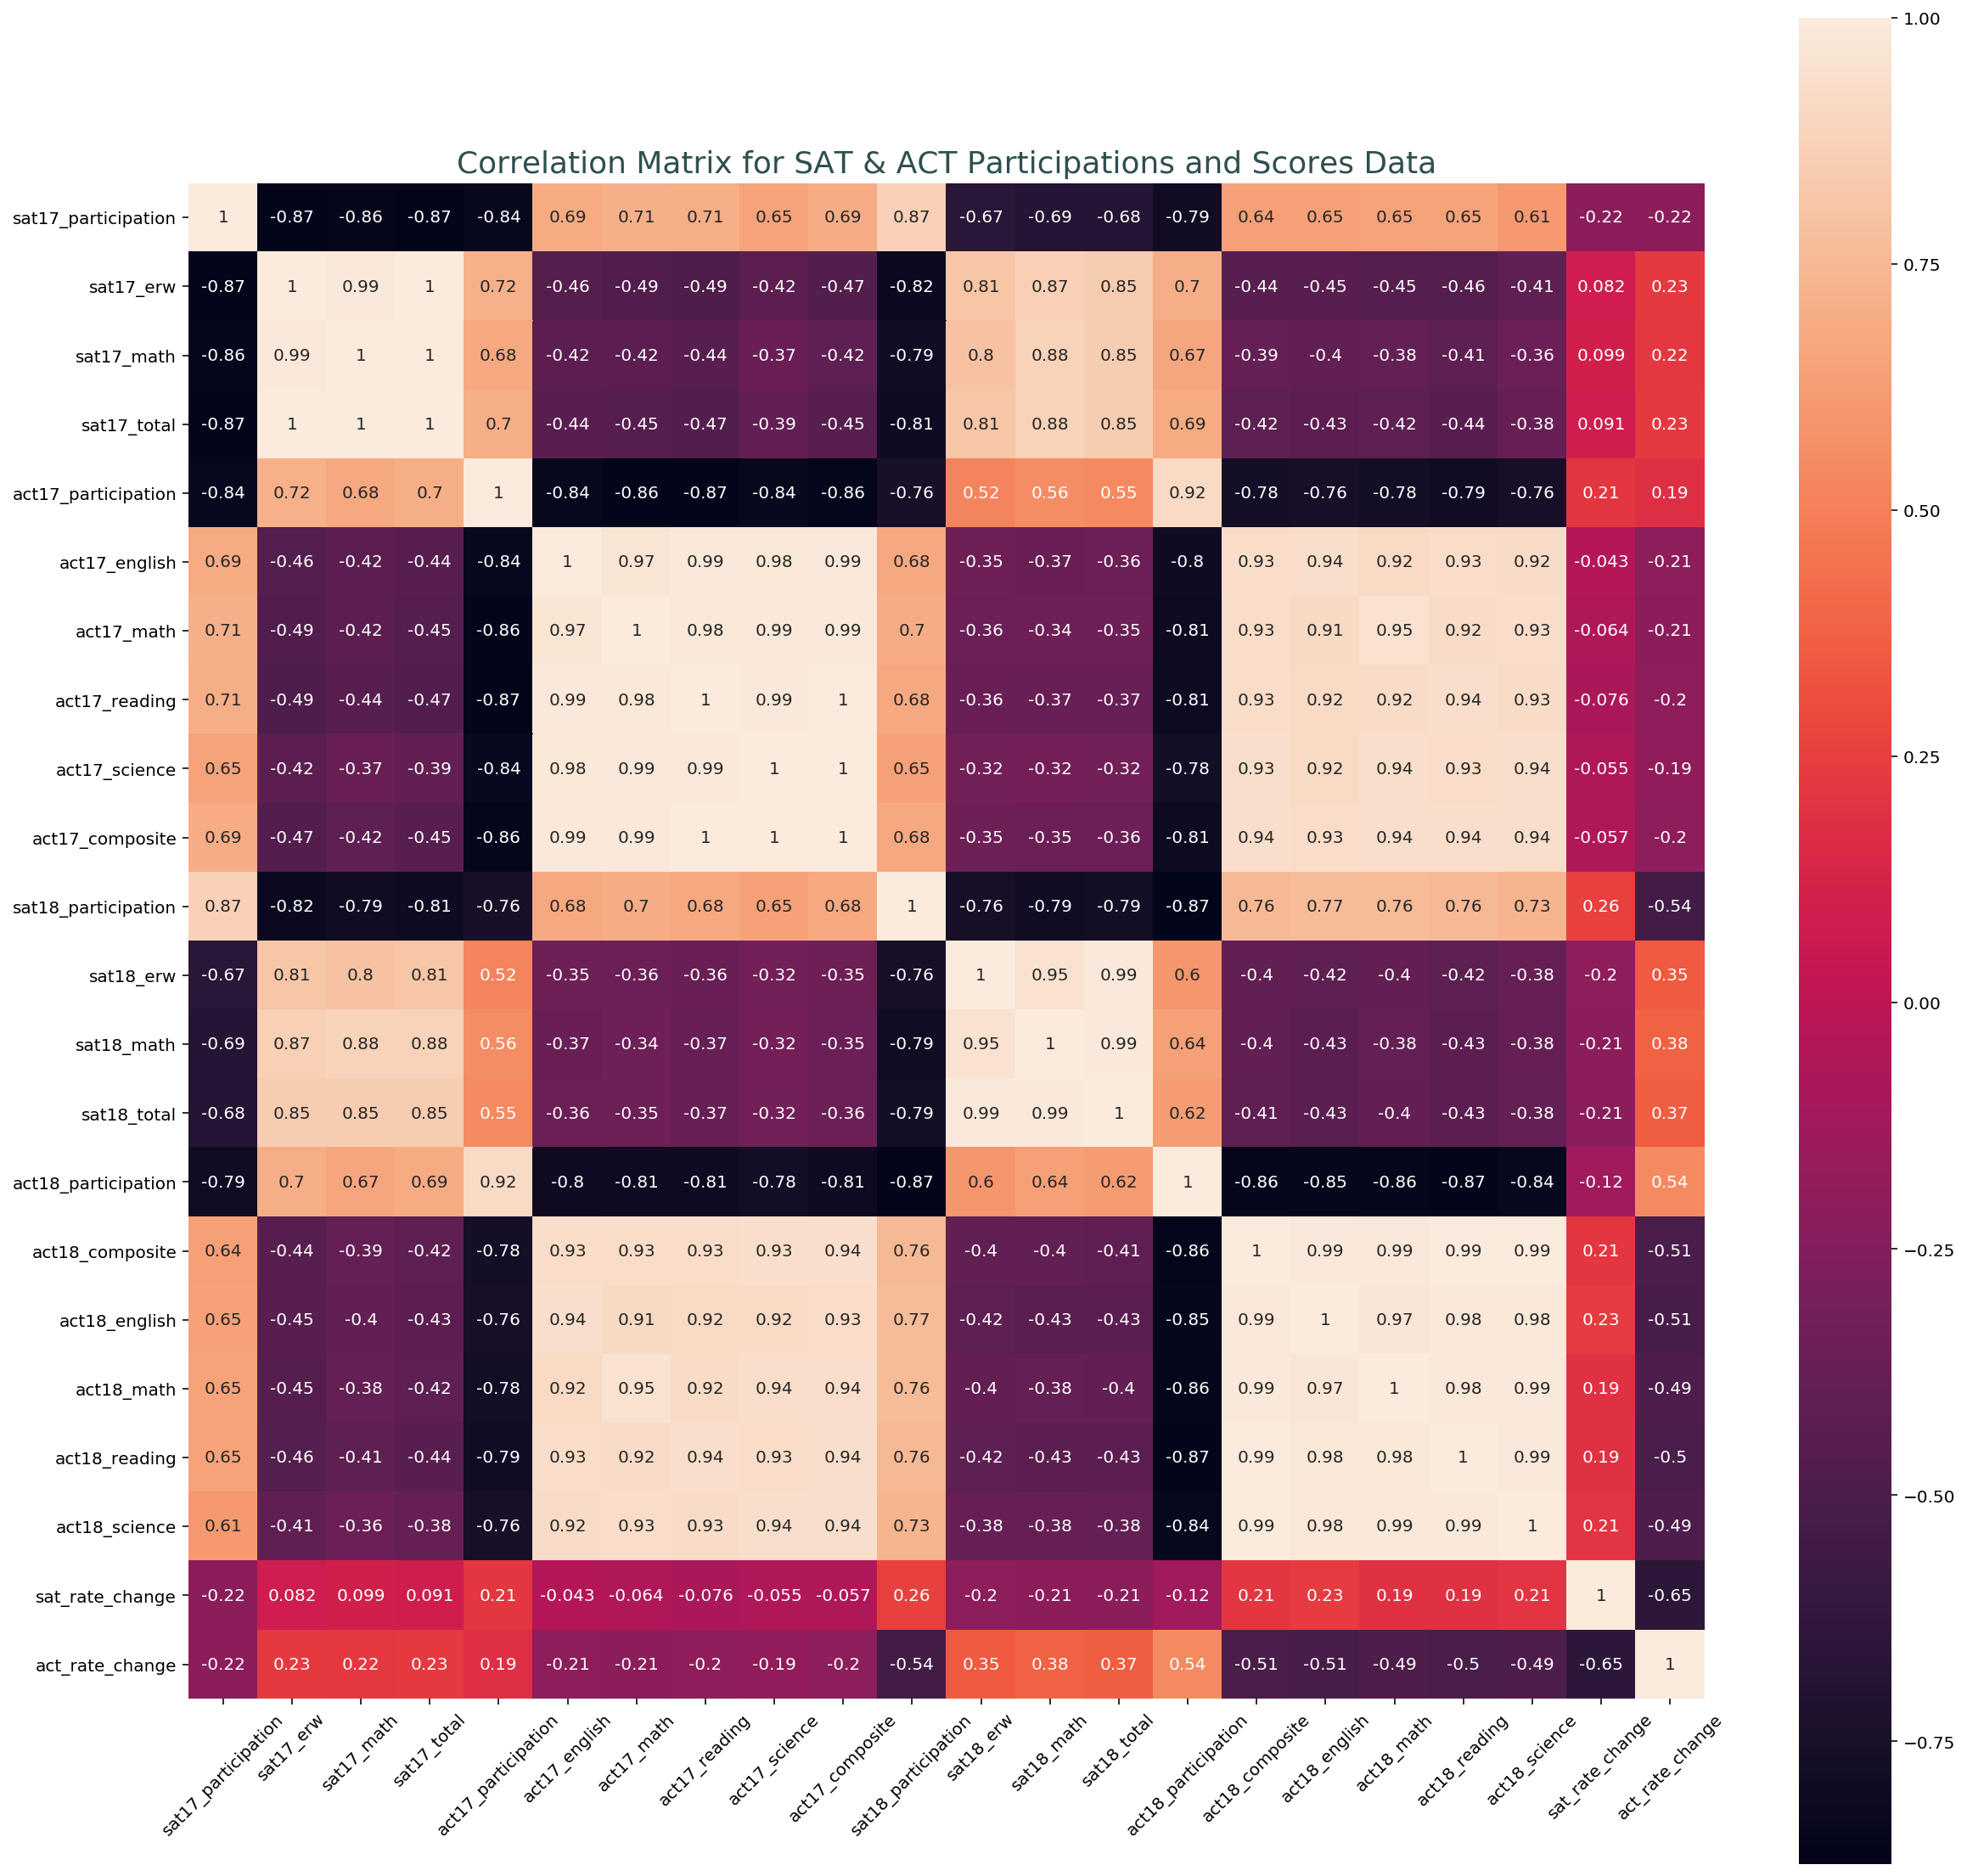

In [181]:
# create Seaborn heat map for cross columns correlation matrix stored within final_corr object.
fig, ax = plt.subplots(figsize=(20,20));
ax = sns.heatmap(final_corr, annot=True,square=True);
ax.set_title("Correlation Matrix for SAT & ACT Participations and Scores Data",color=my_title_col, fontsize = my_title_font);
plt.xticks(rotation=45);

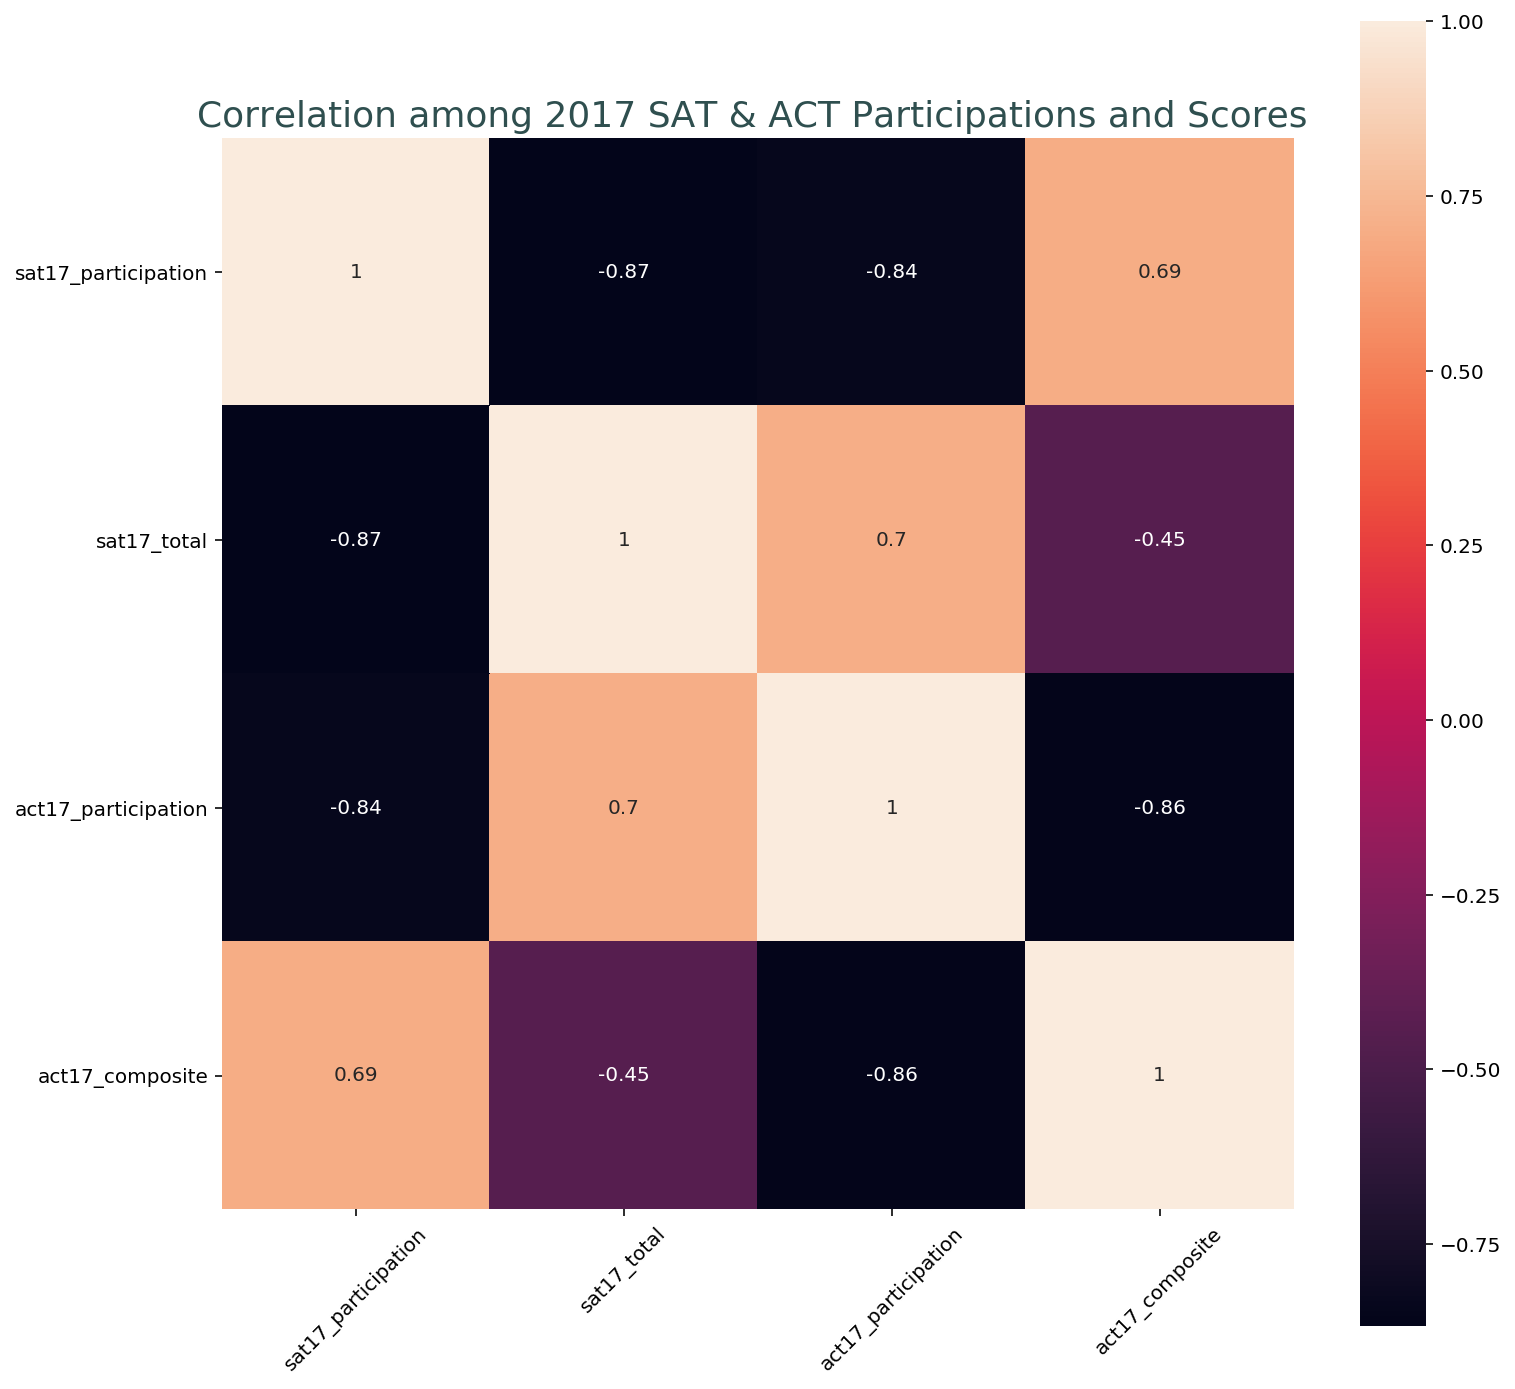

In [239]:
#  correlation matrix stored with fewer and more relavant columns for better readability
subset_corr = sat_act_final[['sat17_participation','sat17_total','act17_participation','act17_composite']].corr()
fig, ax = plt.subplots(figsize=(12,12));
ax = sns.heatmap(subset_corr, annot=True,square=True);
ax.set_title("Correlation among 2017 SAT & ACT Participations and Scores ",color=my_title_col, fontsize = my_title_font);
plt.xticks(rotation=45);
plt.yticks(rotation=0);

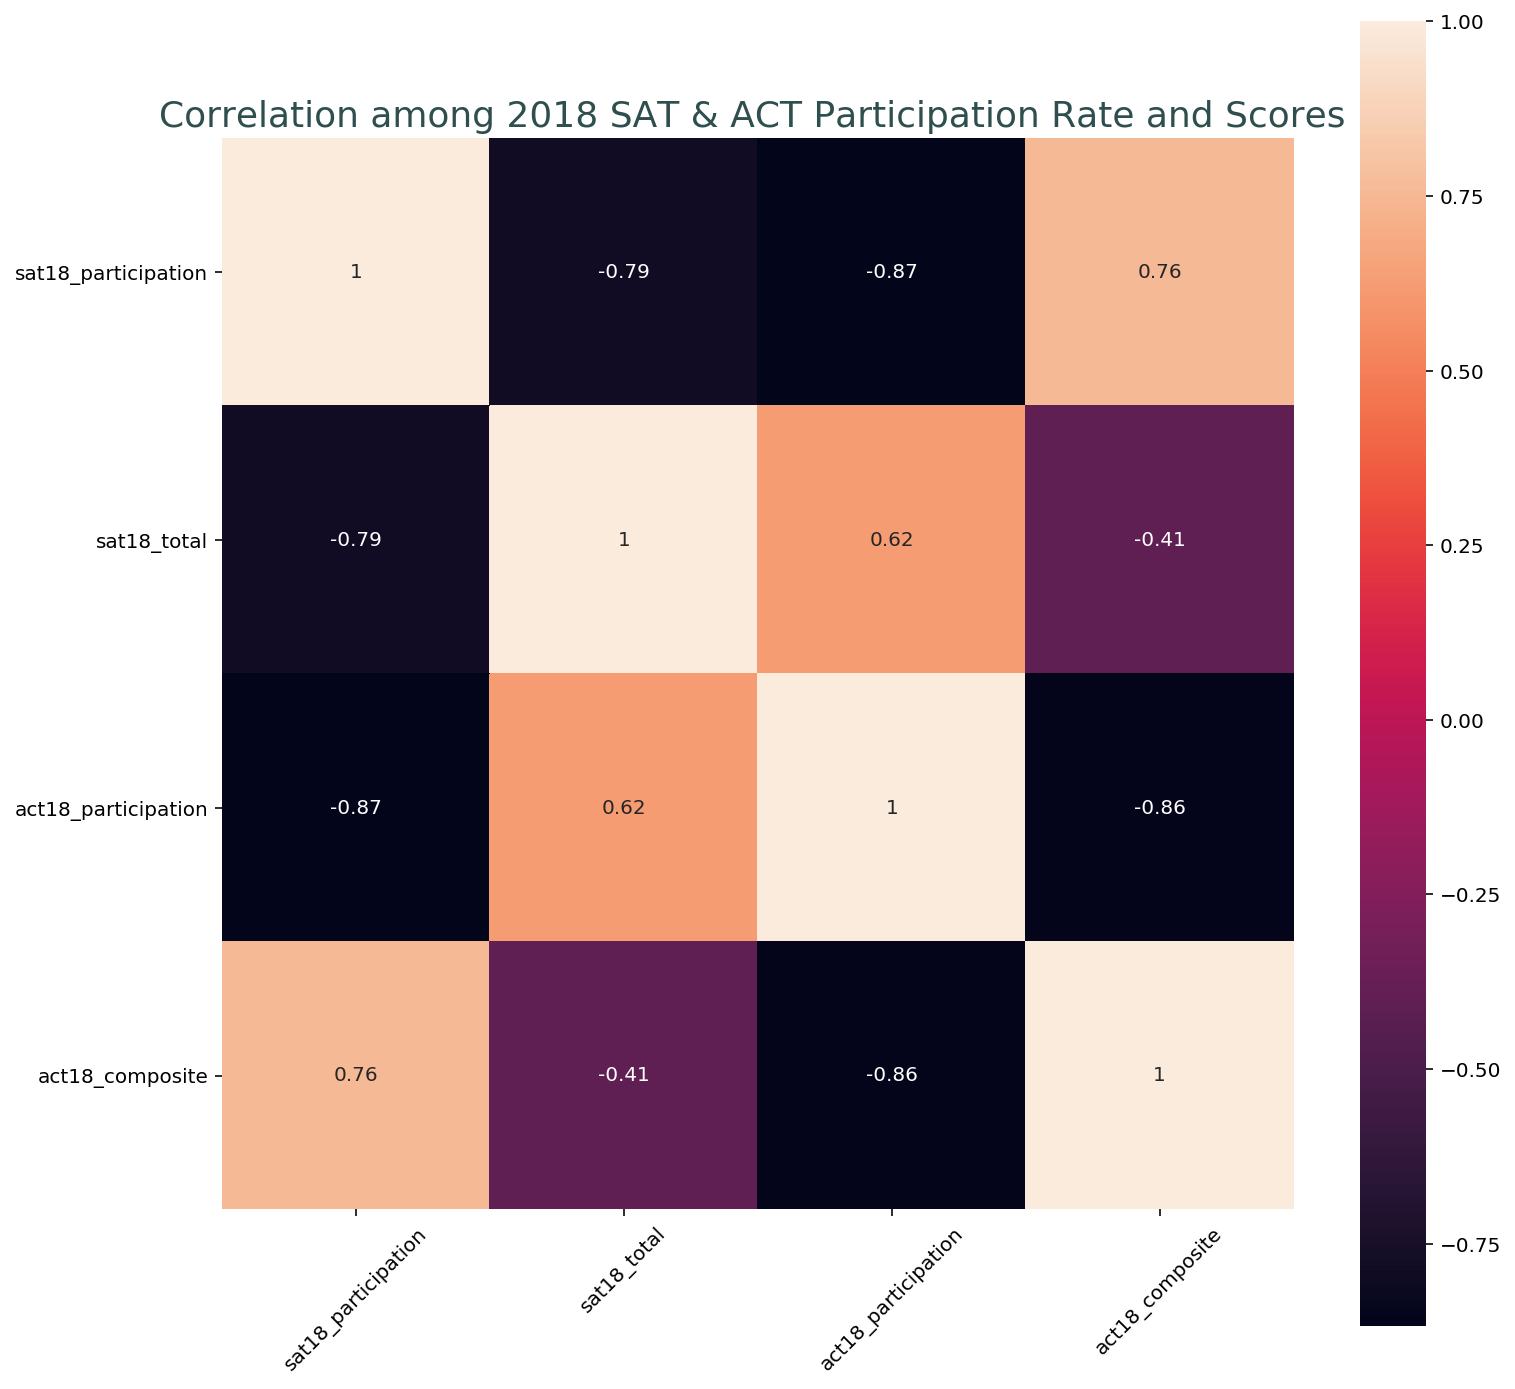

In [238]:
#  correlation matrix stored with fewer and more relavant columns for better readability
subset_corr = sat_act_final[['sat18_participation','sat18_total','act18_participation','act18_composite']].corr()
fig, ax = plt.subplots(figsize=(12,12));
ax = sns.heatmap(subset_corr, annot=True,square=True);
ax.set_title("Correlation among 2018 SAT & ACT Participation Rate and Scores ",color=my_title_col, fontsize = my_title_font);
plt.xticks(rotation=45);
plt.yticks(rotation=0);

#### Overvations from heatmap of correlation among participation and test scores for states.
- There is strong negative corrrelation  between SAT participation rate and SAT total scores in both 2017 (-.87) and 2018 (-.79).
- There is strong negative corrrelation  between ACT participation rate and ACT composite scores in both 2017 (-.86) and 2018 (-.86).
- There is a strong negative corelation between SAT participation rate and ACT participation rate in both 2017 (-.84) and 2018 (-.87).
- There is a moderate negative correlation between average of SAT and ACT total scores within each year.




#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [182]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2 ,figsize=(15,5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color=my_graph_col) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], color=my_title_col, fontsize = my_title_font) 
        ax[i].set_xlabel(list_of_xlabels[i],color=my_label_col, fontsize = my_label_font) 
        ax[i].set_ylabel(list_of_ylabels[i],color=my_label_col, fontsize = my_label_font)
        
    
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

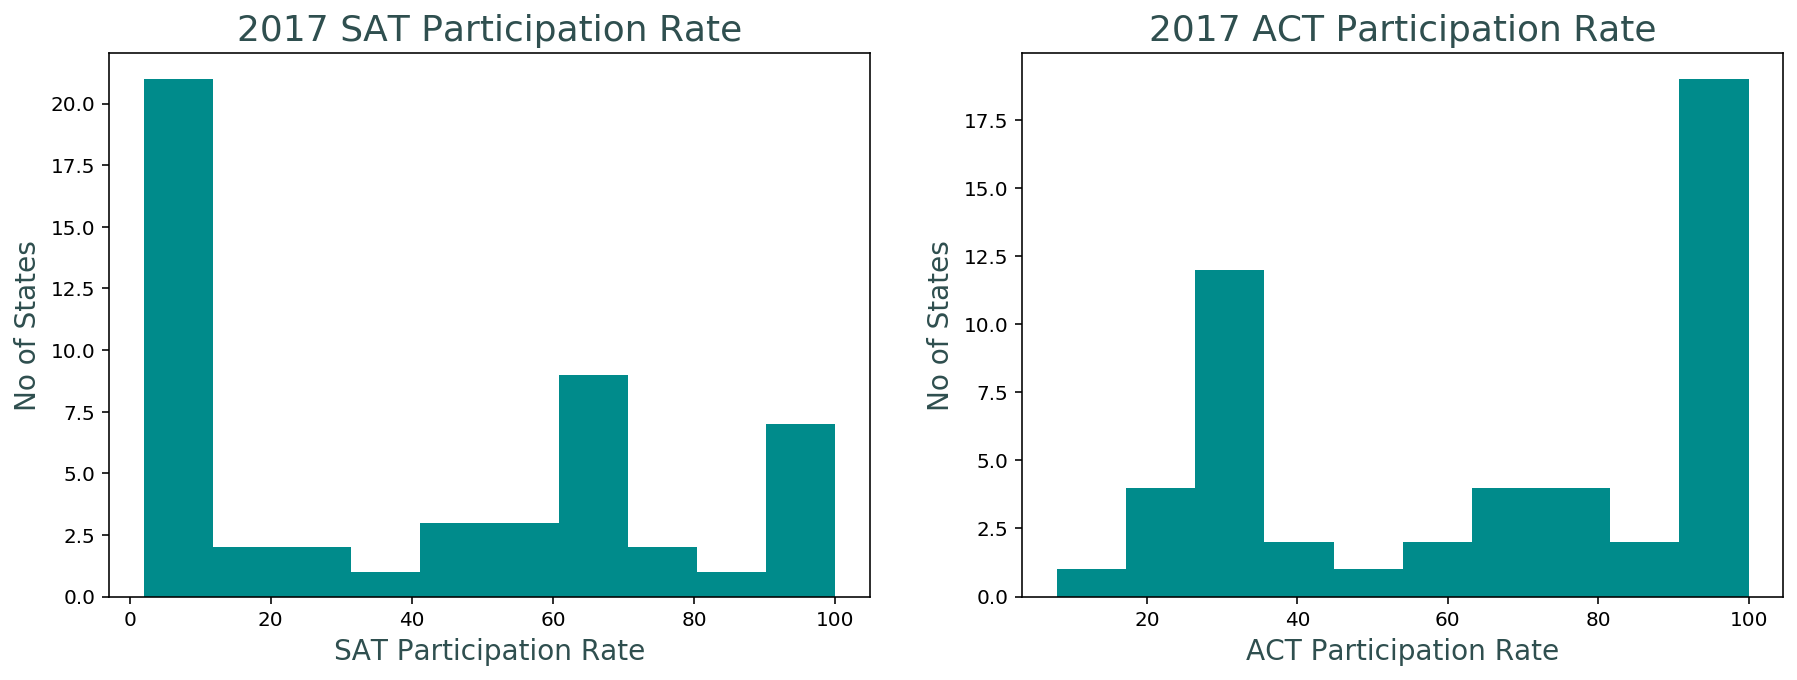

In [183]:
# Plot for Participation rates for SAT & ACT of 2017
subplot_histograms(sat_act_final,['sat17_participation','act17_participation'],\
                                 ['2017 SAT Participation Rate', '2017 ACT Participation Rate'], \
                                 ['SAT Participation Rate','ACT Participation Rate'], ['No of States','No of States'])

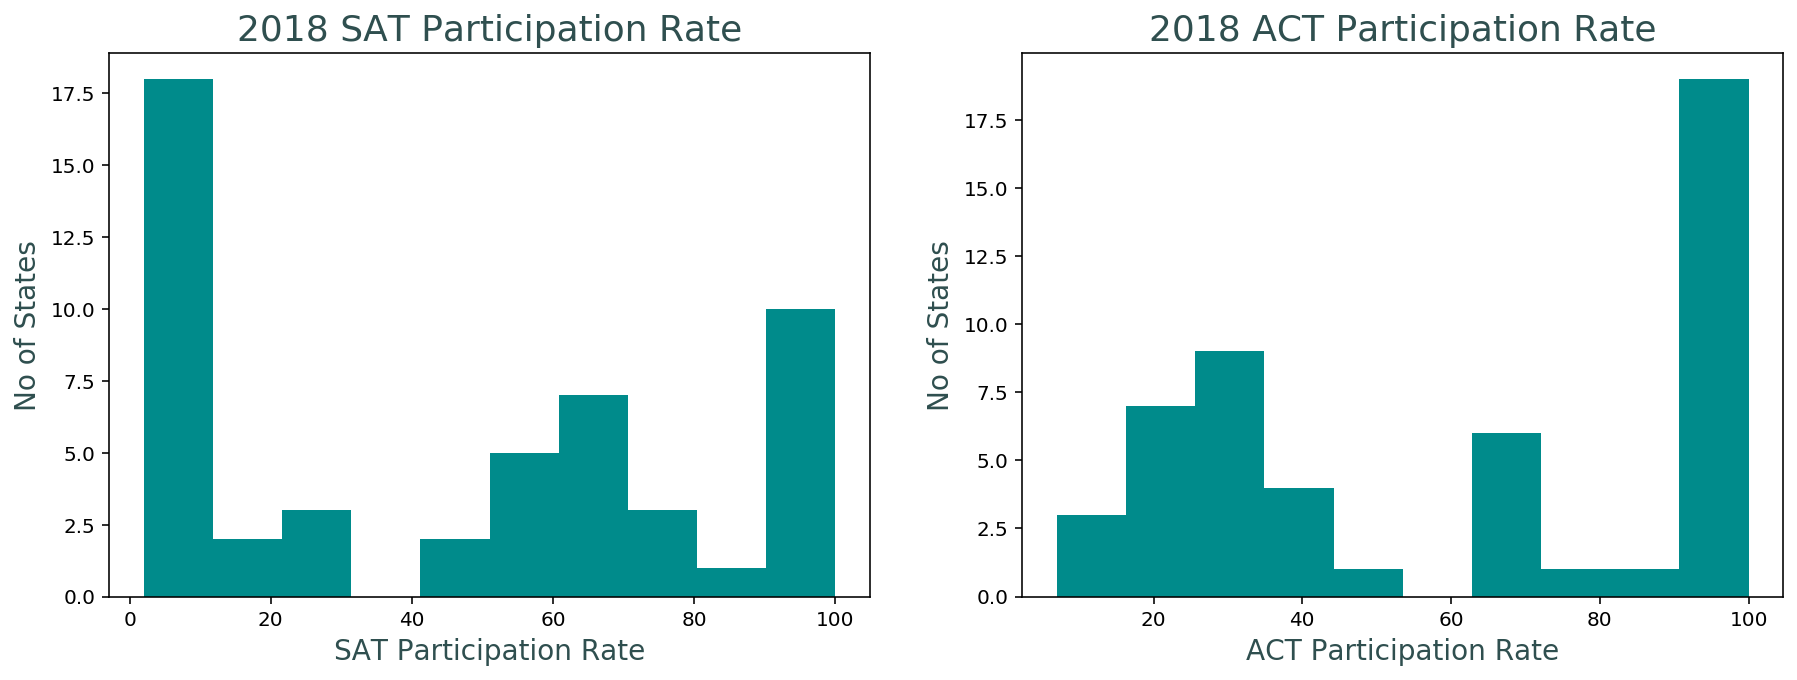

In [184]:
# Plot for Participation rates for SAT & ACT of 2018
subplot_histograms(sat_act_final,['sat18_participation','act18_participation'],\
                                 ['2018 SAT Participation Rate', '2018 ACT Participation Rate'], \
                                 ['SAT Participation Rate','ACT Participation Rate'], ['No of States','No of States'])

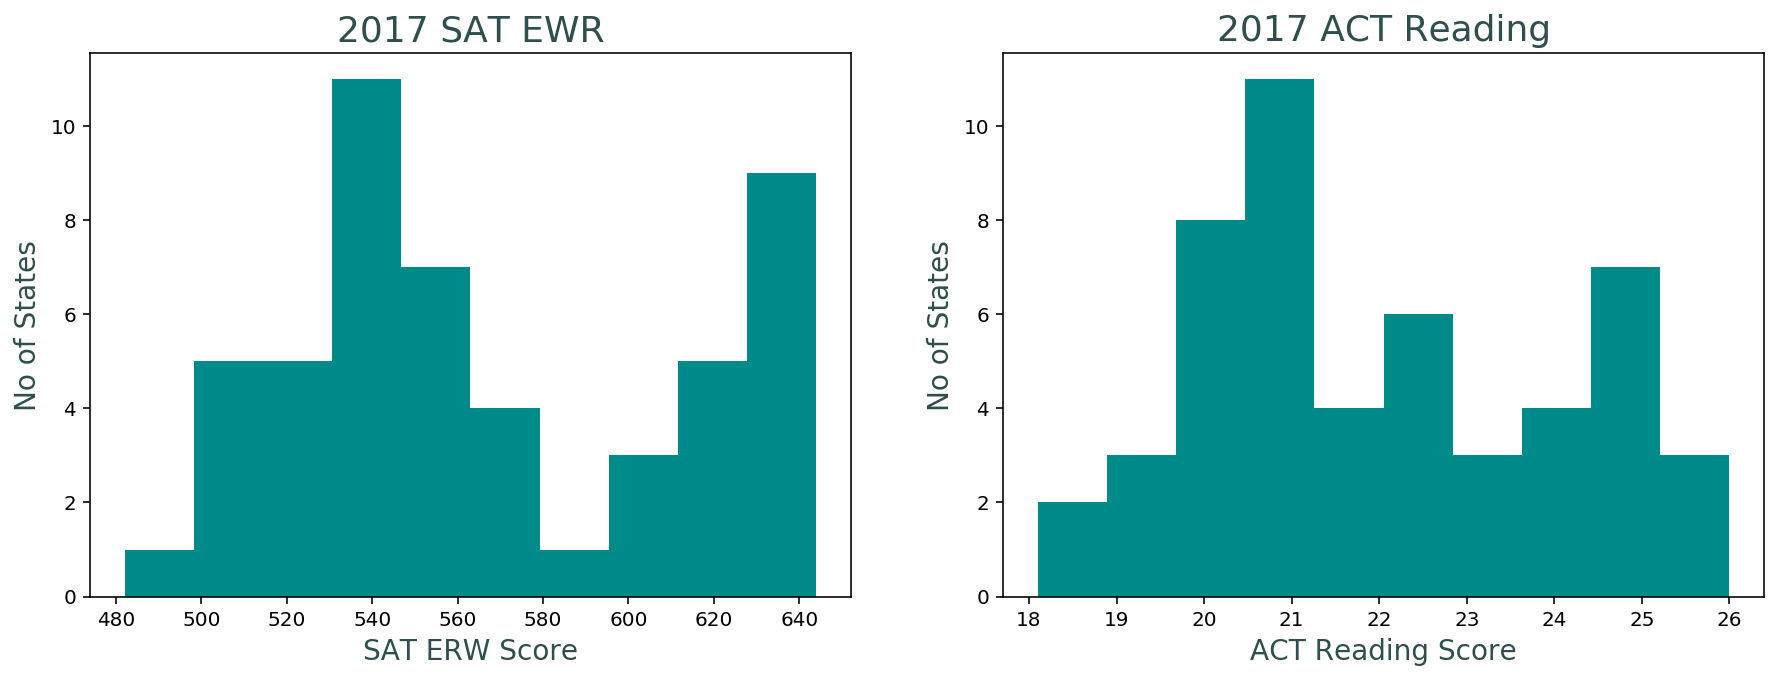

In [185]:
# Plot for SAT ERW And ACT Reading for SAT & ACT of 2017
subplot_histograms(sat_act_final,['sat17_erw','act17_reading'],\
                                 ['2017 SAT EWR', '2017 ACT Reading'], \
                                 ['SAT ERW Score','ACT Reading Score'], ['No of States','No of States'])

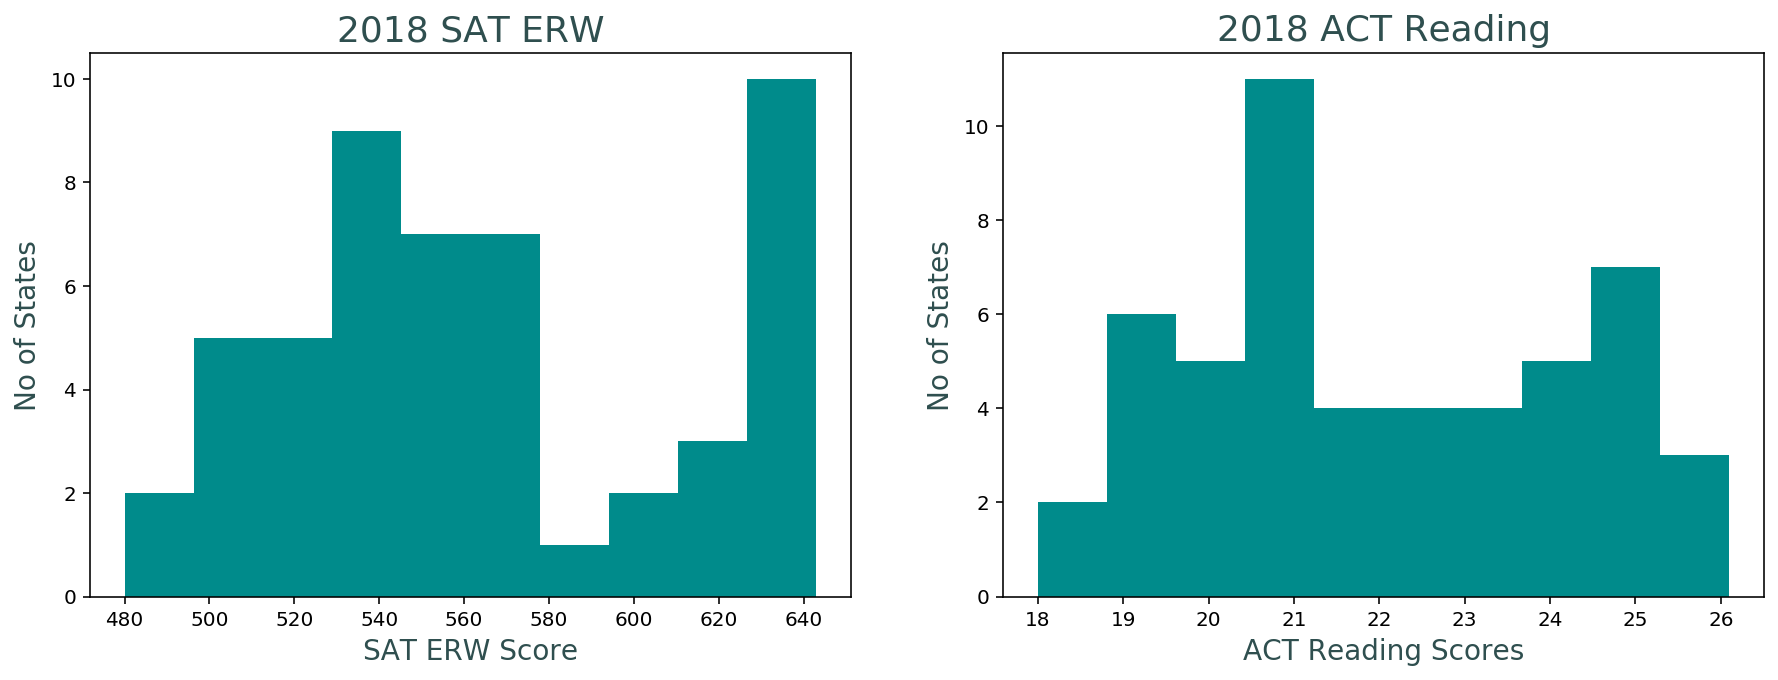

In [264]:
# Plot for SAT ERW And ACT Reading for SAT & ACT of 2018
subplot_histograms(sat_act_final,['sat18_erw','act18_reading'],\
                                 ['2018 SAT ERW', '2018 ACT Reading'], \
                                 ['SAT ERW Score','ACT Reading Scores'], ['No of States','No of States'])

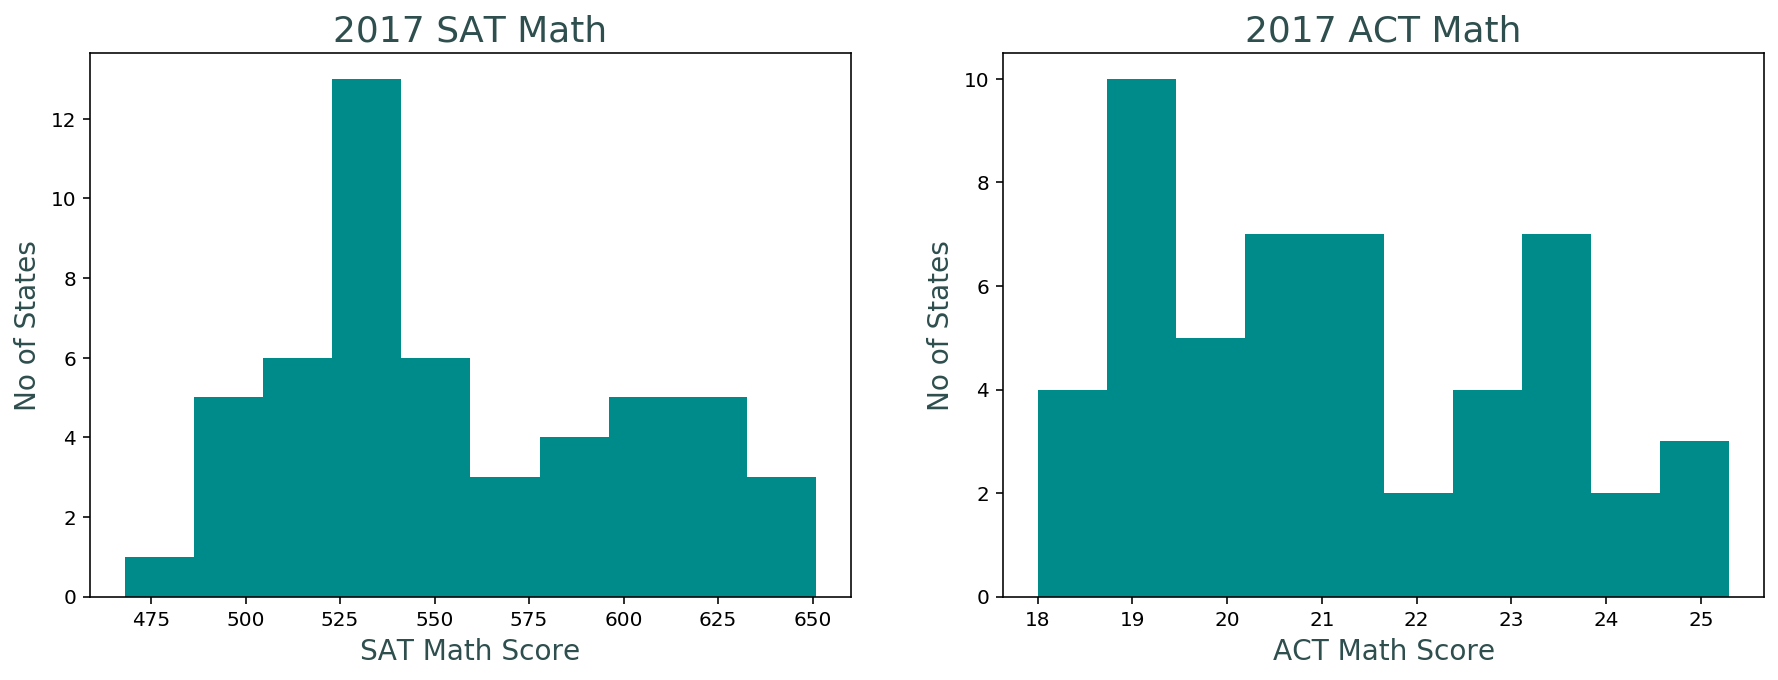

In [265]:
# Plot for SAT Math And ACT Math in 2017
subplot_histograms(sat_act_final,['sat17_math','act17_math'],\
                                 ['2017 SAT Math', '2017 ACT Math'], \
                                 ['SAT Math Score','ACT Math Score'], ['No of States','No of States'])

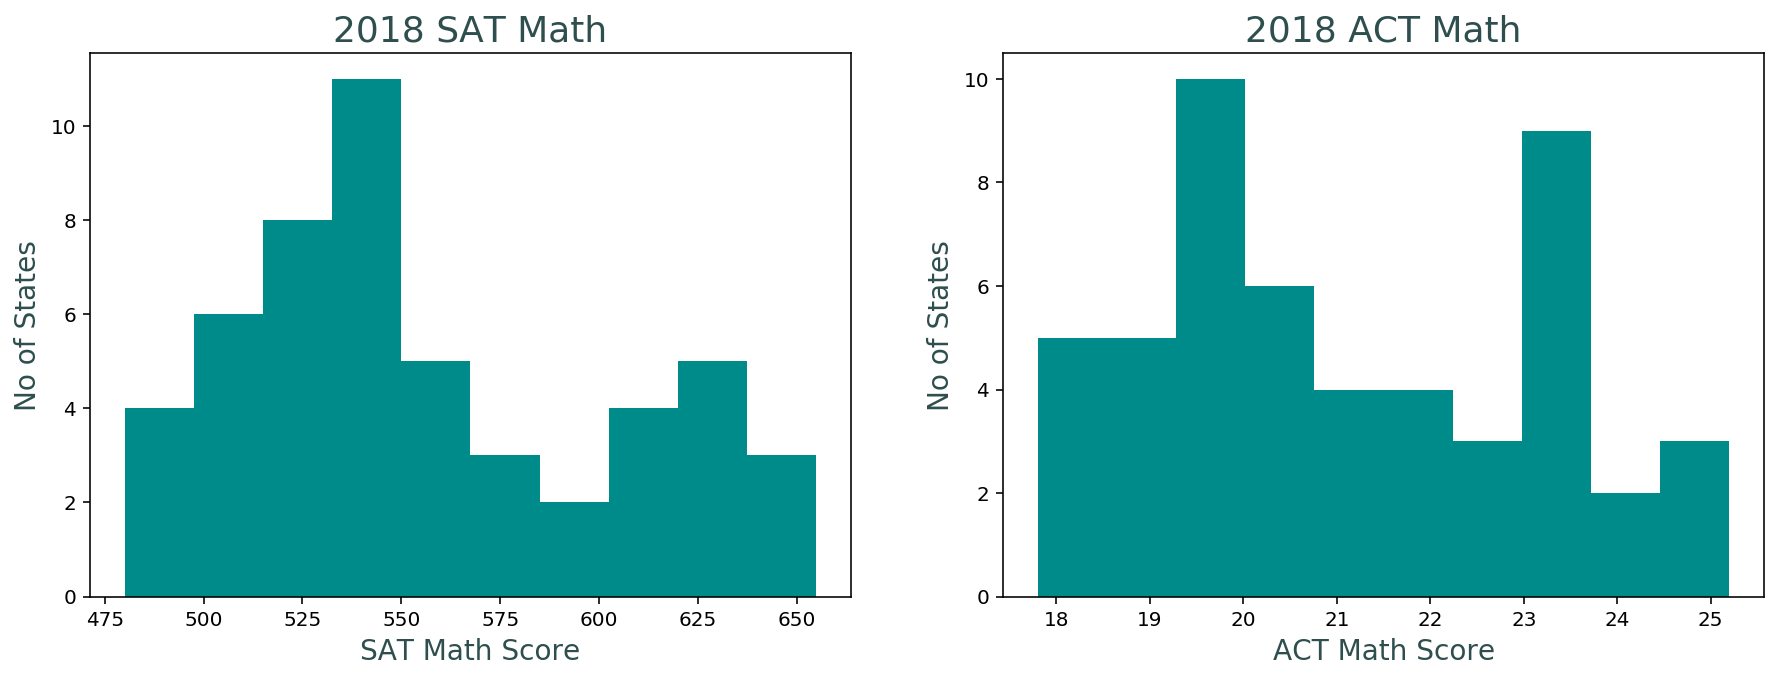

In [266]:
# Plot for SAT Math And ACT Math in 2018
subplot_histograms(sat_act_final,['sat18_math','act18_math'],\
                                 ['2018 SAT Math', '2018 ACT Math'], \
                                 ['SAT Math Score','ACT Math Score'], ['No of States','No of States'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


# Scatter Plots
Scatter plots were built by using matplotlib figure object and seaborn's regplot function.

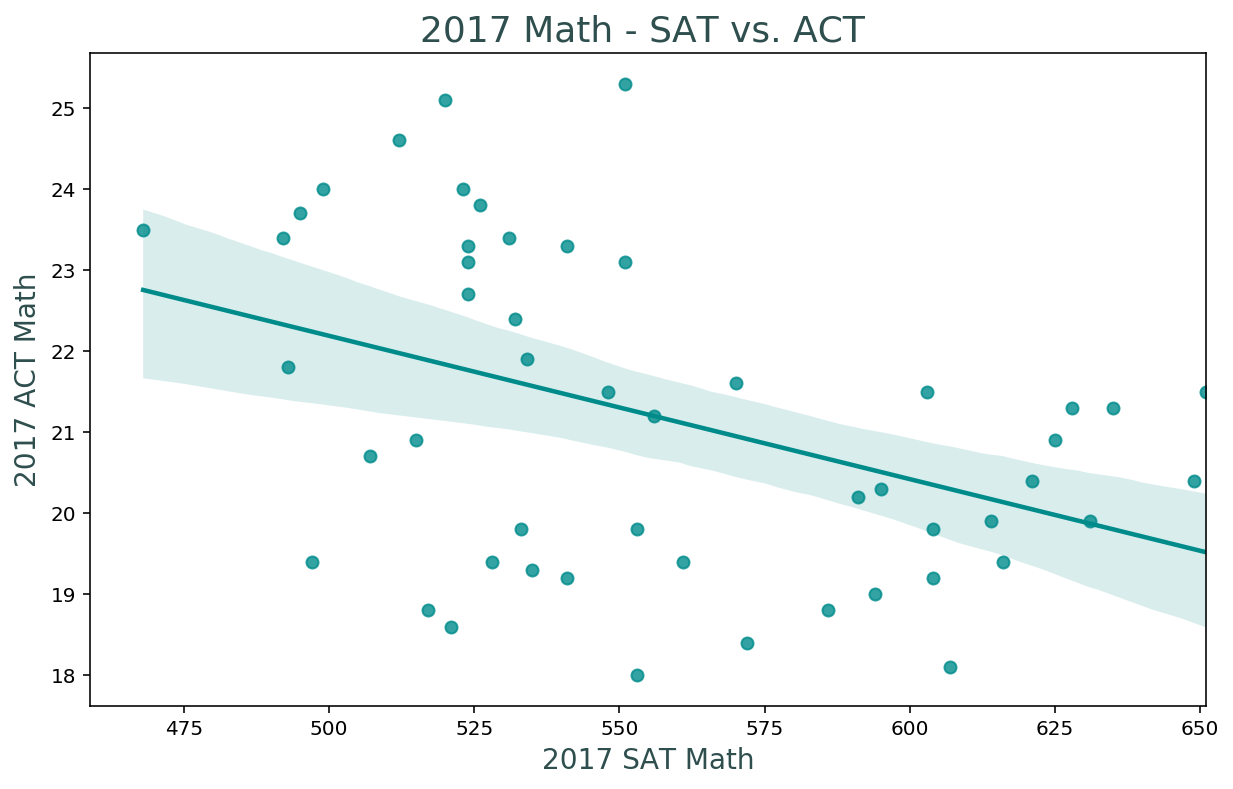

In [189]:
# Scatter plot for '2017 SAT Average Math score and 2017 ACT Average Math score'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final["sat17_math"],y=sat_act_final["act17_math"], color=my_graph_col);
ax.set_title("2017 Math - SAT vs. ACT ",color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2017 SAT Math",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2017 ACT Math",color=my_label_col, fontsize = my_label_font);

#### Observations:
Although an outlier in this data is distroting the visual representation of data, however look like that state with higher SAT math average have lower ACT scores and vice versa.  

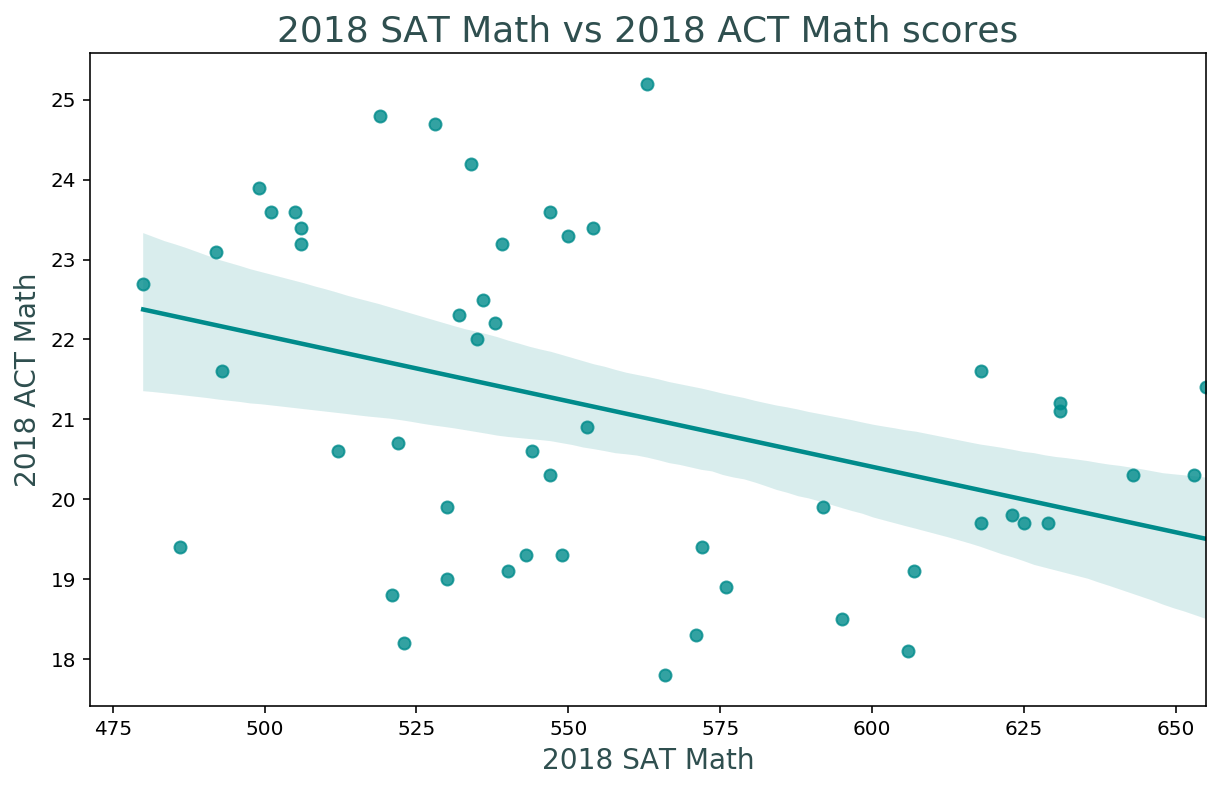

In [216]:
# Scatter plot for '2018 SAT Math vs 2018 ACT Math score'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final['sat18_math'],y=sat_act_final['act18_math'], color=my_graph_col);
ax.set_title("2018 SAT Math vs 2018 ACT Math scores", color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2018 SAT Math",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2018 ACT Math",color=my_label_col, fontsize = my_label_font);

#### Observation:
States with higher ACT math score tend to have lower SAT math scores and vice versa.

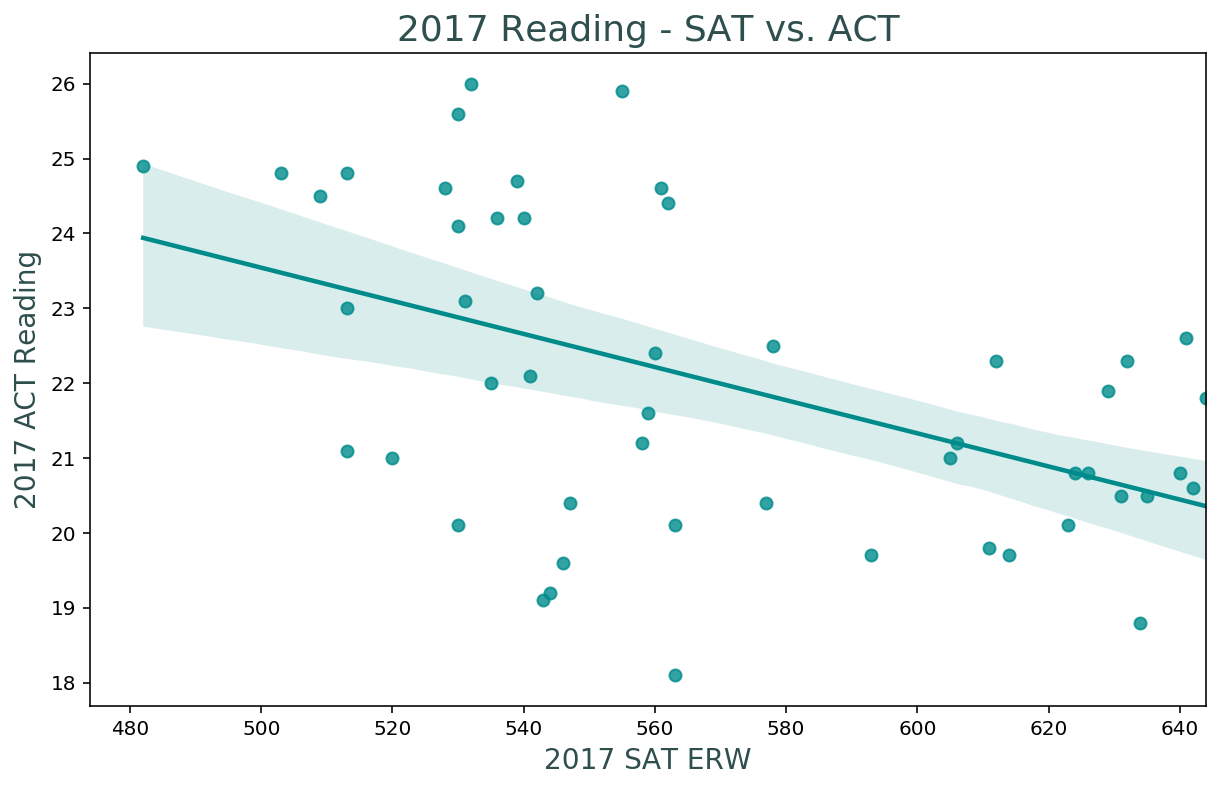

In [217]:
# Scatter plot for '2017 SAT ERW and 2017 ACT Reading for each state'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final['sat17_erw'],y=sat_act_final['act17_reading'],color = my_graph_col);
ax.set_title("2017 Reading - SAT vs. ACT",color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2017 SAT ERW",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2017 ACT Reading",color=my_label_col, fontsize = my_label_font);

#### Observation:
States with higher ACT reading score tend to have lower SAT ERW scores and vice versa.

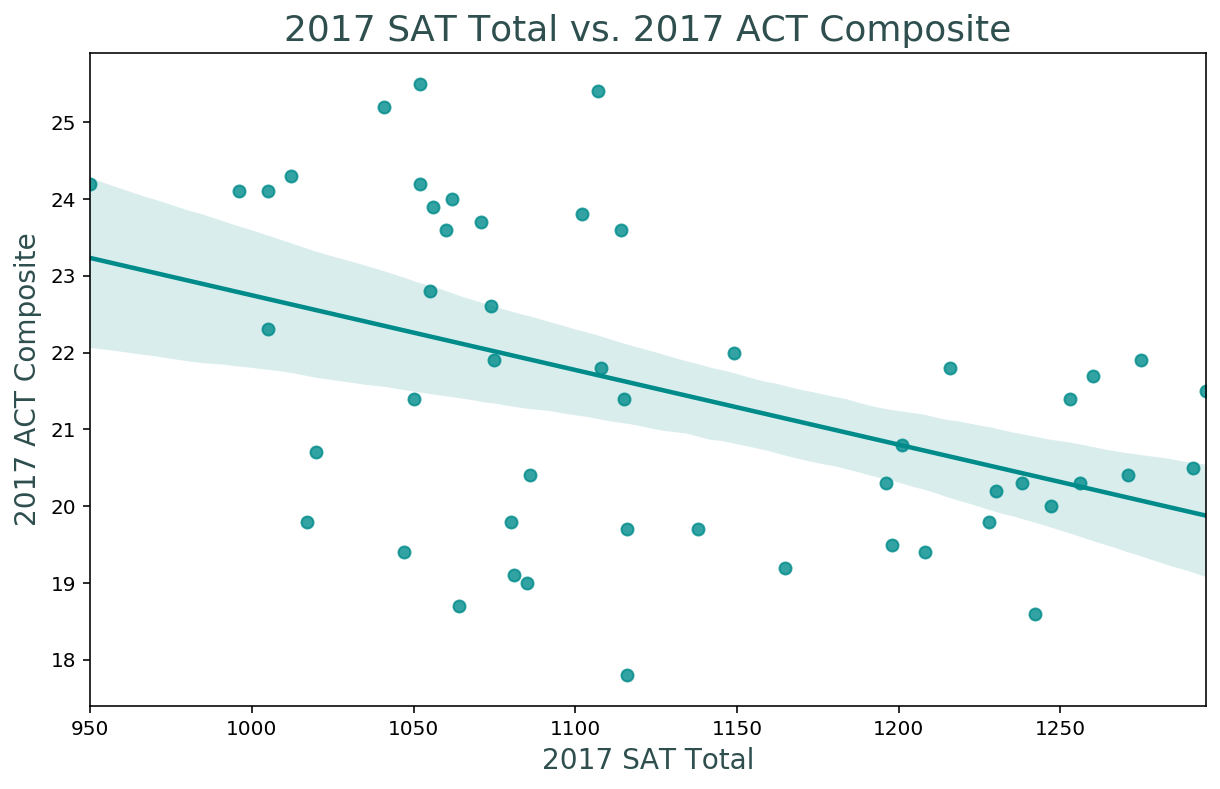

In [191]:
# Scatter plot for '2017 SAT Total score and 2017 ACT Composite score for each state'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final["sat17_total"],y=sat_act_final["act17_composite"],color = my_graph_col);
ax.set_title("2017 SAT Total vs. 2017 ACT Composite",color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2017 SAT Total",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2017 ACT Composite",color=my_label_col, fontsize = my_label_font);


#### Observation:
States with higher ACT composite scores tend to have lower SAT total scores and vice versa.

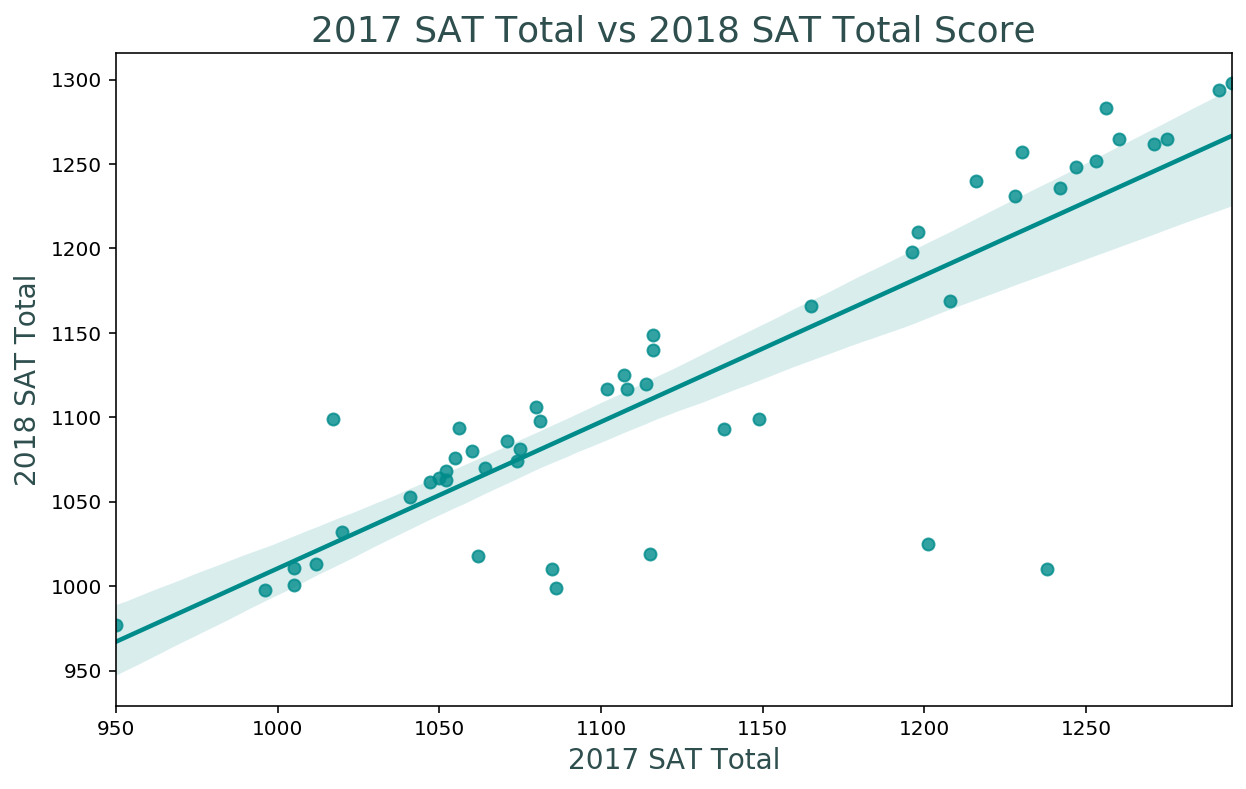

In [192]:
# Scatter plot for '2017 SAT total score and 2018 SAT TOTAL score for each state'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final['sat17_total'], y=sat_act_final['sat18_total'], color = my_graph_col);
ax.set_title("2017 SAT Total vs 2018 SAT Total Score",color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2017 SAT Total",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2018 SAT Total",color=my_label_col, fontsize = my_label_font);

#### Observation:
2017 SAT total scores not suprisingly have strong positive correlation with 2018 SAT toal scores.

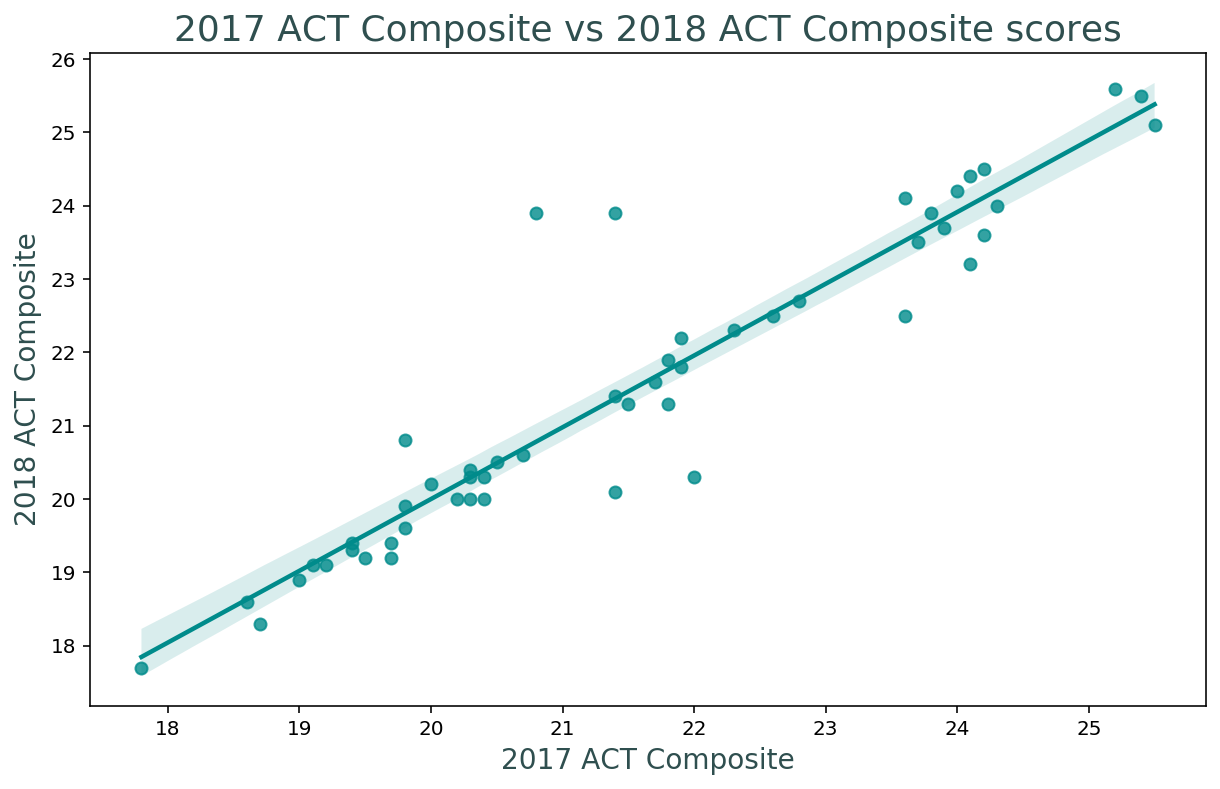

In [193]:
# Scatter plot for '2017 ACT Composite score and 2018 ACT Composite score for each state'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final['act17_composite'],y=sat_act_final['act18_composite'], color=my_graph_col);
ax.set_title("2017 ACT Composite vs 2018 ACT Composite scores", color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2017 ACT Composite",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2018 ACT Composite",color=my_label_col, fontsize = my_label_font);

#### Observation:
2017 ACT Composite scores have strong positive correlation with 2018 ACT composite scores.

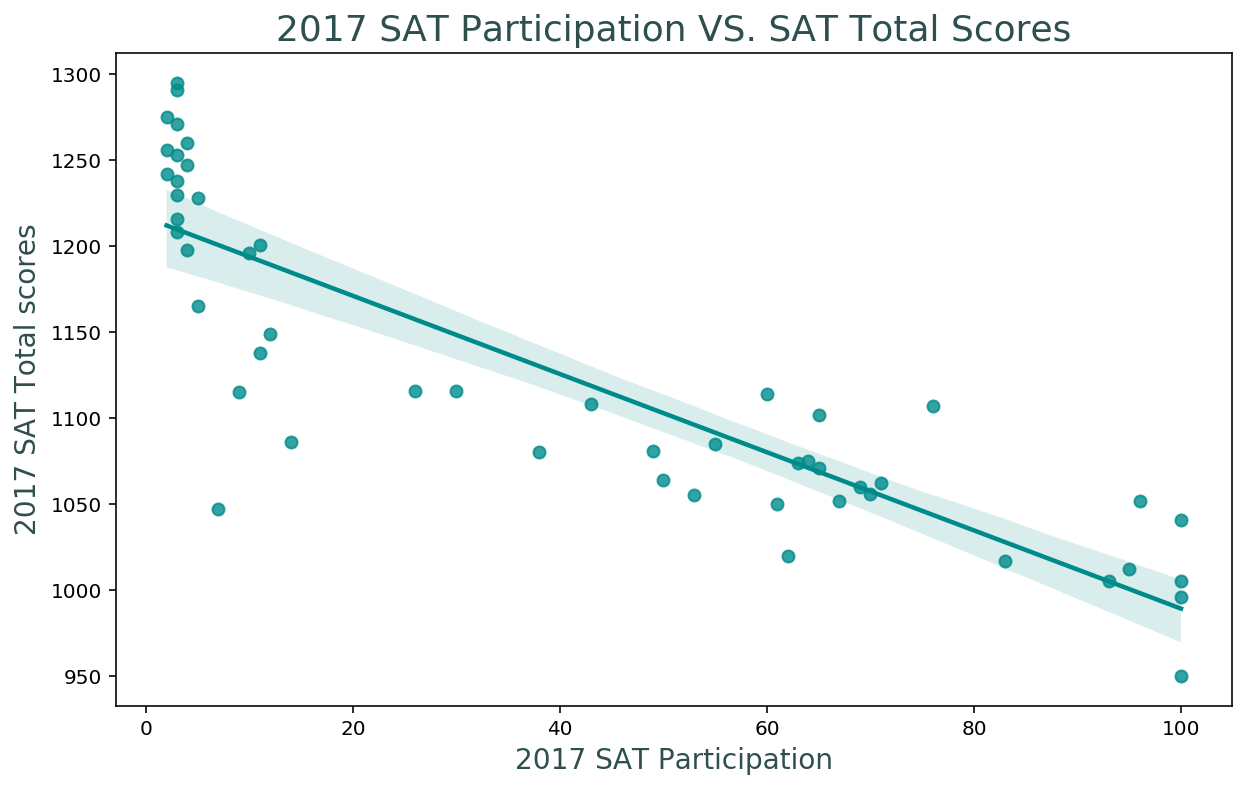

In [219]:
# Scatter plot for '2017 SAT Participation rate vs 2017 SAT Total scores for each state'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final['sat17_participation'],y=sat_act_final['sat17_total'], color=my_graph_col);
ax.set_title("2017 SAT Participation VS. 2017 SAT Total Scores", color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2017 SAT Participation",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2017 SAT Total scores",color=my_label_col, fontsize = my_label_font);

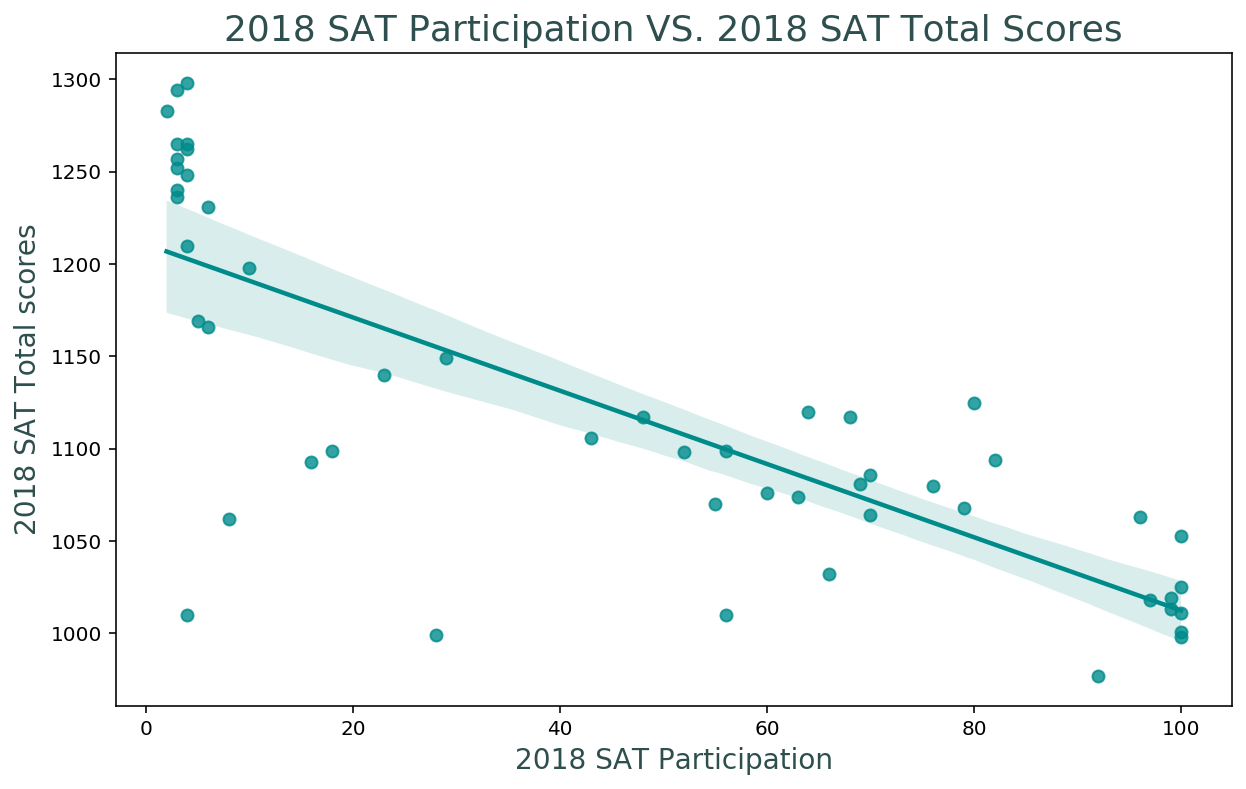

In [221]:
# Scatter plot for '2018 SAT Participation rate vs 2018 SAT Total scores for each state'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final['sat18_participation'],y=sat_act_final['sat18_total'], color=my_graph_col);
ax.set_title("2018 SAT Participation VS. 2018 SAT Total Scores", color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2018 SAT Participation",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2018 SAT Total scores",color=my_label_col, fontsize = my_label_font);

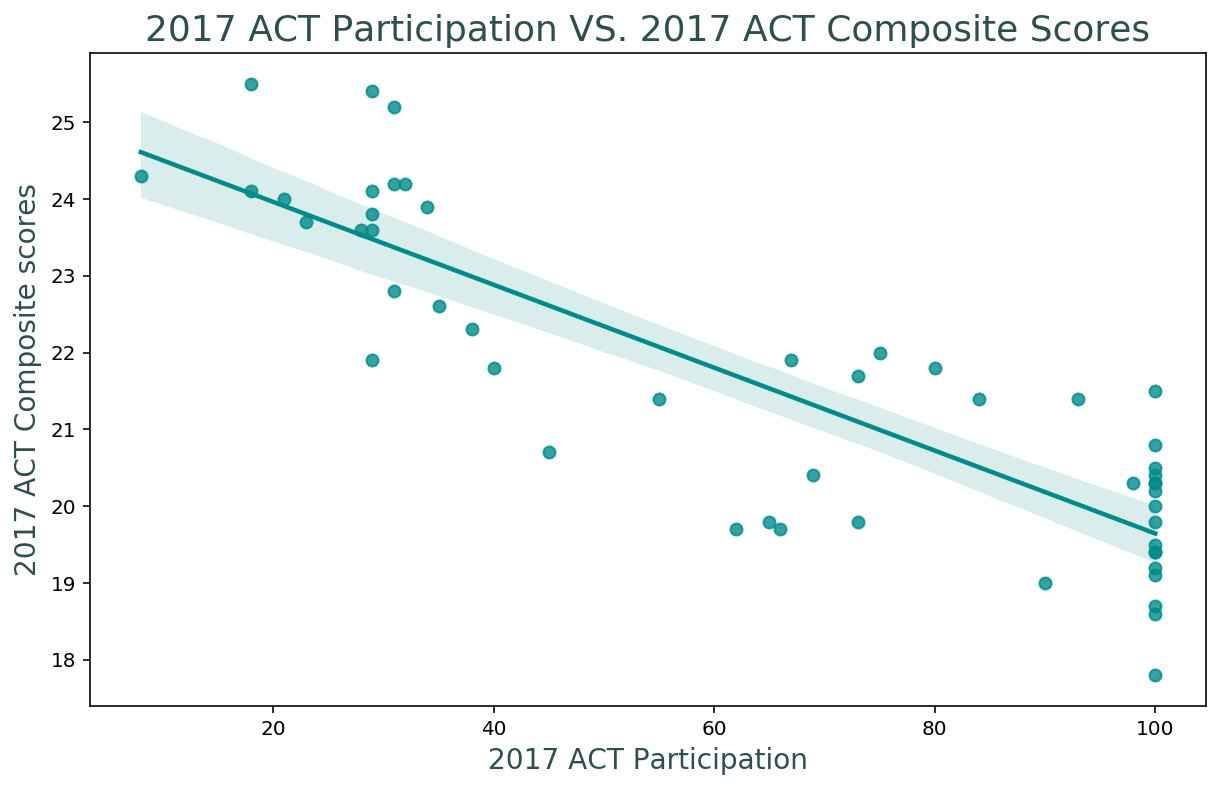

In [222]:
# Scatter plot for '2017 ACT Participation rate vs 2017 ACT Composite scores for each state'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final['act17_participation'],y=sat_act_final['act17_composite'], color=my_graph_col);
ax.set_title("2017 ACT Participation VS. 2017 ACT Composite Scores", color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2017 ACT Participation",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2017 ACT Composite scores",color=my_label_col, fontsize = my_label_font);

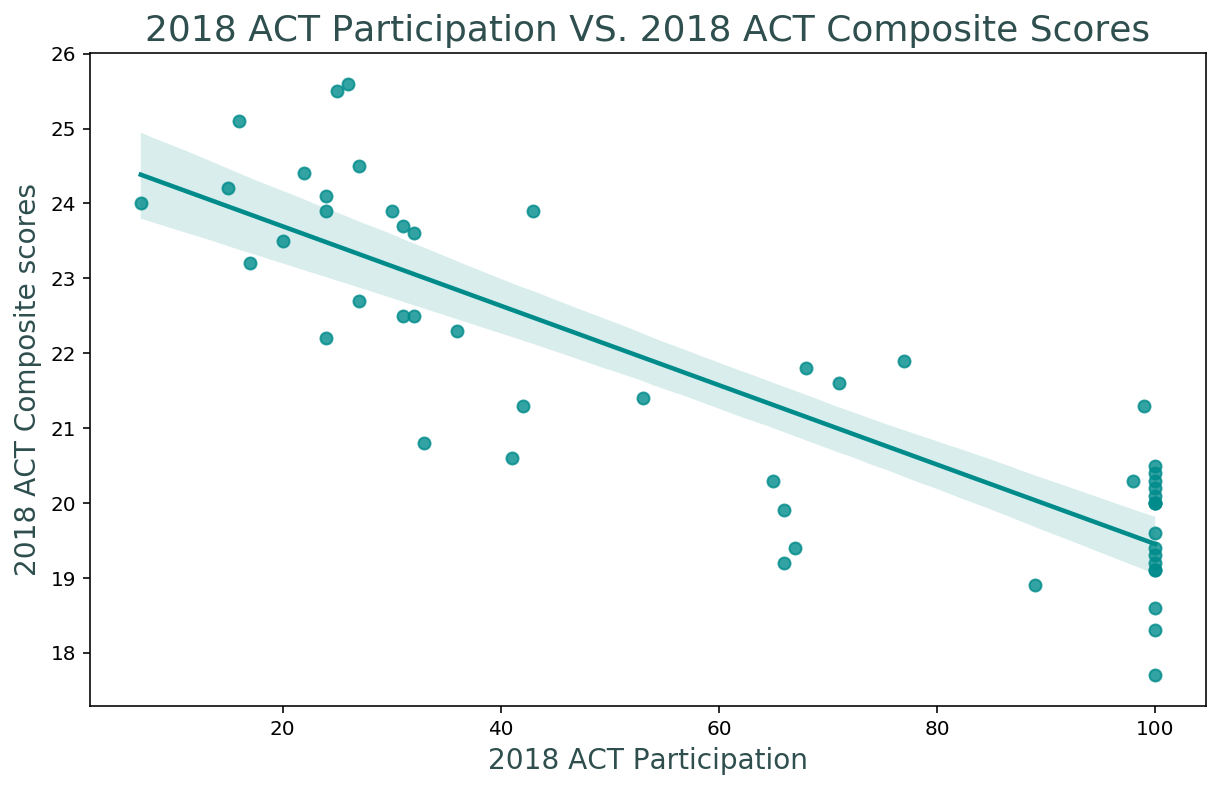

In [223]:
# Scatter plot for '2018 ACT Participation rate vs 2018 ACT Composite scores for each state'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(x=sat_act_final['act18_participation'],y=sat_act_final['act18_composite'], color=my_graph_col);
ax.set_title("2018 ACT Participation VS. 2018 ACT Composite Scores", color=my_title_col, fontsize = my_title_font);
ax.set_xlabel("2018 ACT Participation",color=my_label_col, fontsize = my_label_font);
ax.set_ylabel("2018 ACT Composite scores",color=my_label_col, fontsize = my_label_font);

#### Observations:
From the four plots published above, it is quite clear that for ACT and SAT, states with higher participation rates have lower average Total test scores.  

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

# Box Plots
Box plots were created using matplotlib and sns.boxplot() function and by using 

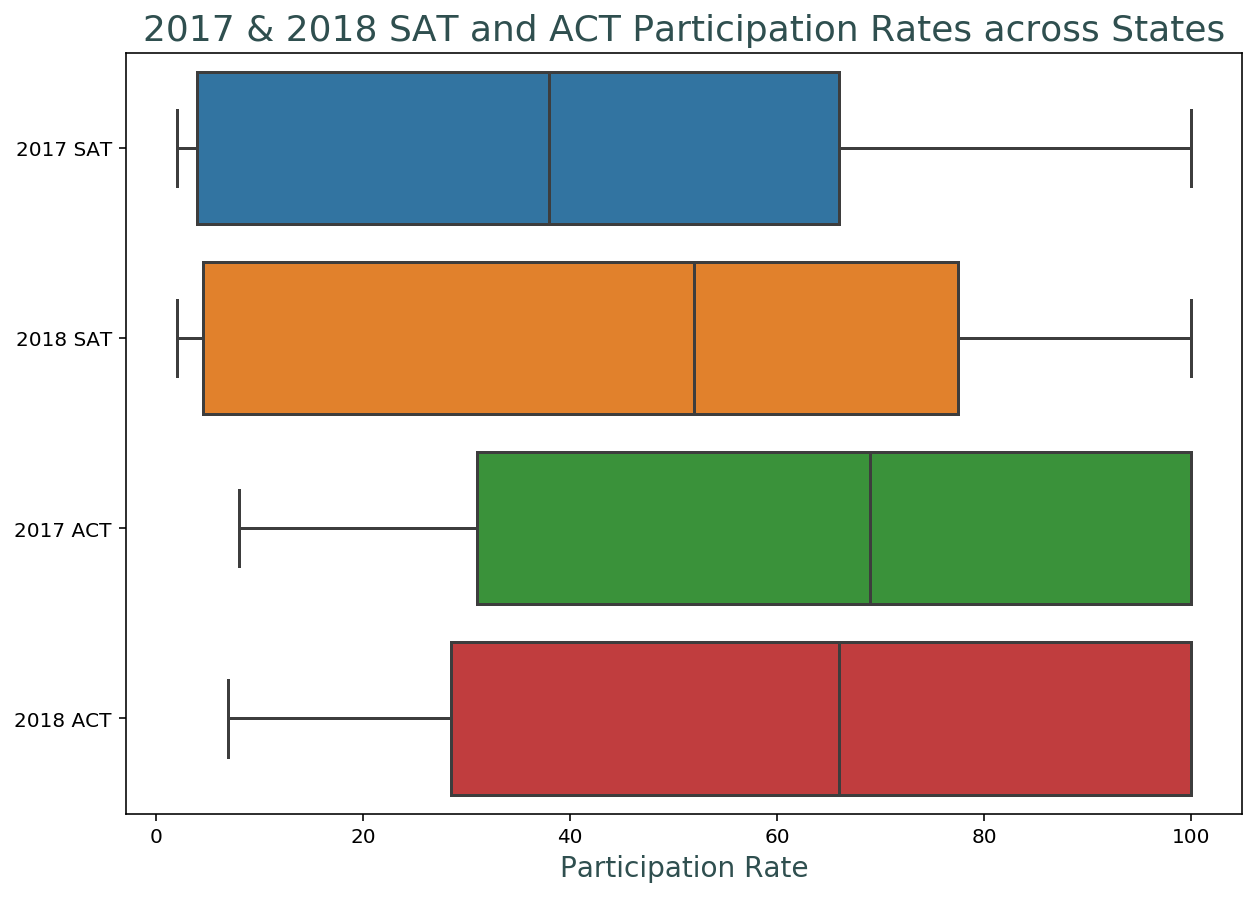

In [196]:
# Using horizontal sns.boxplots by providing dataframe with selected variables to review and their corresponding 
# yticks labels list.
box_data = sat_act_final[['sat17_participation','sat18_participation','act17_participation','act18_participation']]
ytick_labels = ['2017 SAT','2018 SAT', '2017 ACT', '2018 ACT']
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(data=(box_data),orient="h");
ax.set_title('2017 & 2018 SAT and ACT Participation Rates across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Participation Rate',color = my_label_col, fontsize = my_label_font)
ax.set_yticklabels(ytick_labels);

#### Observation:
While there is an improvement on overall SAT participation rate, however from the IQRs of this box plot, is it very clear that majority of the State have higher participation rates for ACT as compared to SAT, suggesting an opportunity for college board to move majority of states to higher IQR range of SAT participation rates.

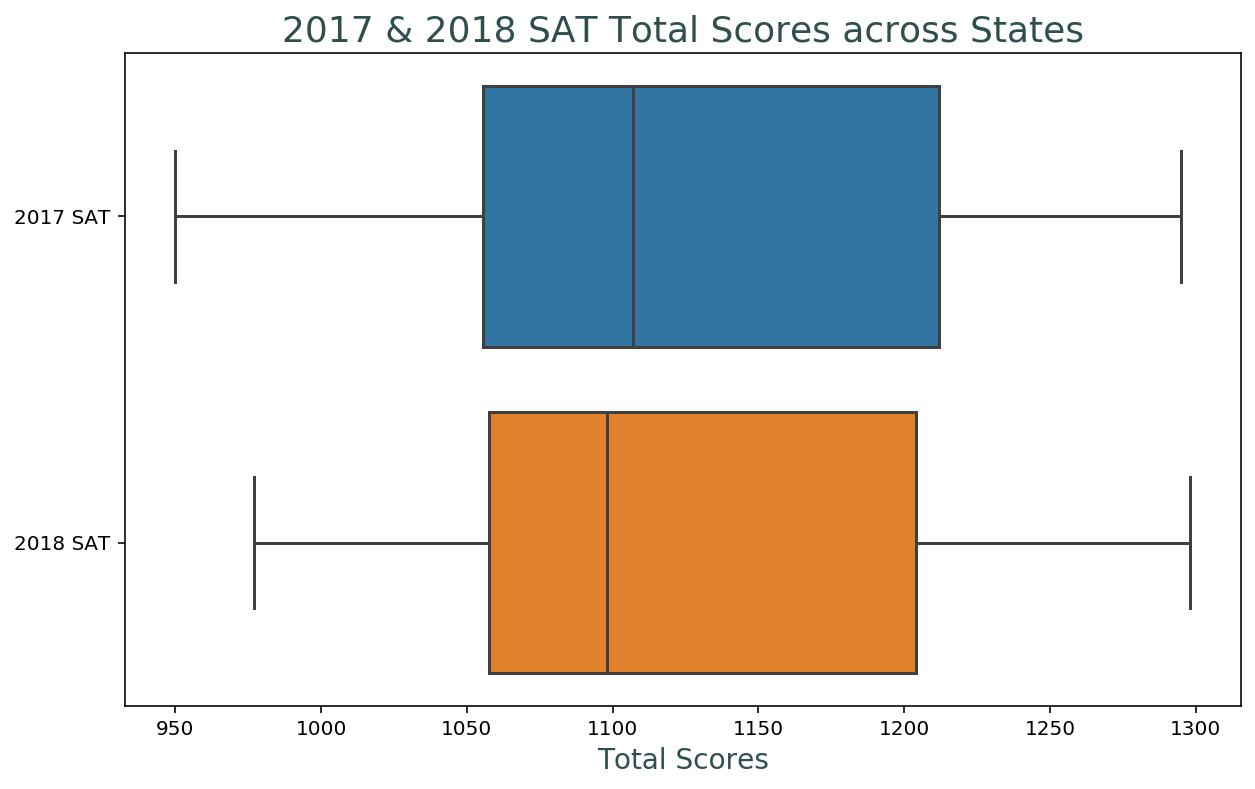

In [207]:
# Using horizontal sns.boxplots by providing dataframe with selected variables to review and their corresponding 
# yticks labels list.
box_data = sat_act_final[['sat17_total','sat18_total']]
ytick_labels = ['2017 SAT','2018 SAT']
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(data=box_data ,orient='h');
ax.set_title('2017 & 2018 SAT Total Scores across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Total Scores',color=my_label_col, fontsize = my_label_font);
ax.set_yticklabels(ytick_labels);

#### Observation:
Even the highest average SAT total score have improve in 2018, the total score under 75th percentile have decreased. 

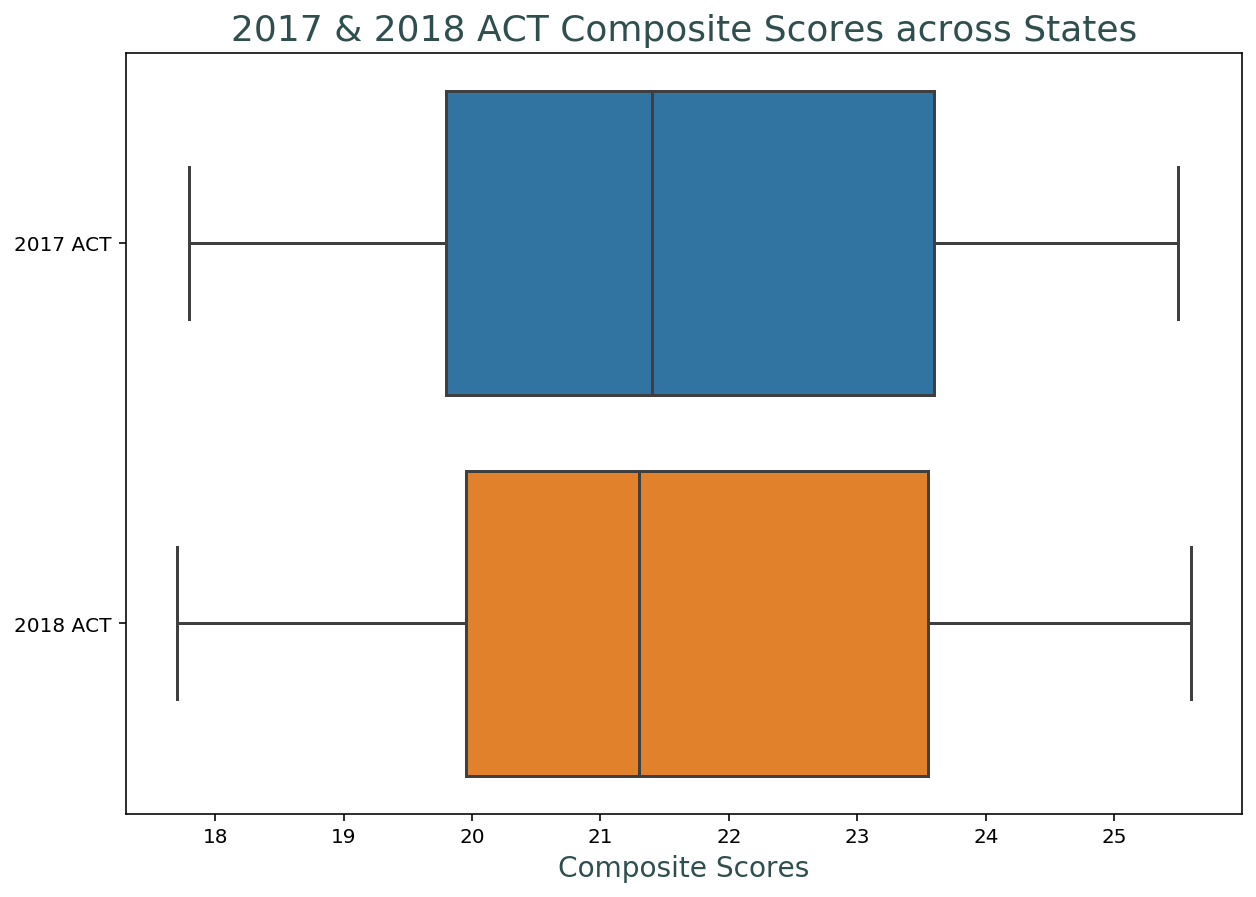

In [218]:
# Using horizontal sns.boxplots by providing dataframe with selected variables to review and their corresponding 
# yticks labels list.
box_data = sat_act_final[['act17_composite','act18_composite']]
ytick_labels = ['2017 ACT','2018 ACT']
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(data=box_data ,orient='h');
ax.set_title('2017 & 2018 ACT Composite Scores across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Composite Scores',color=my_label_col, fontsize = my_label_font);
ax.set_yticklabels(ytick_labels);

#### Observations:
States under the 25th percentile have improved in their composite scores in 2018.

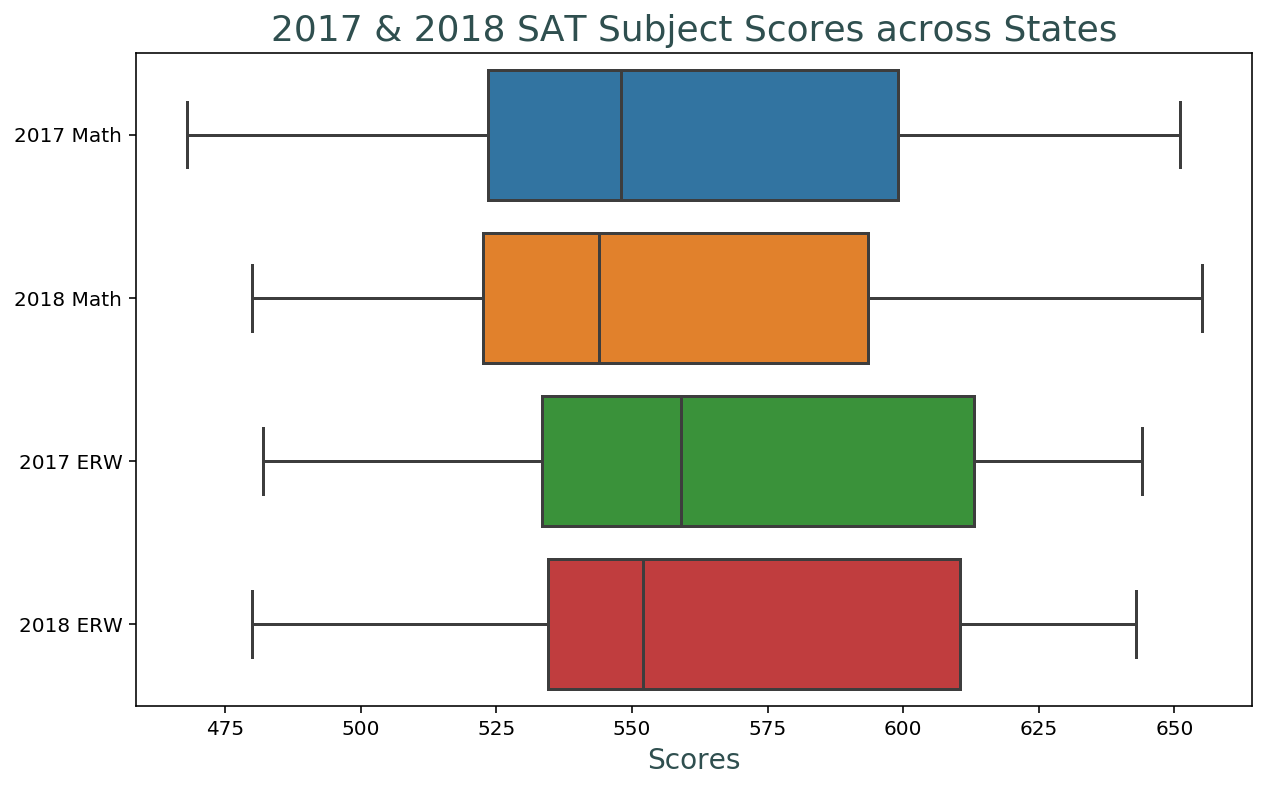

In [211]:
# Using horizontal sns.boxplots by providing dataframe with selected variables to review and their corresponding 
# yticks labels list.
box_data = sat_act_final[['sat17_math','sat18_math','sat17_erw','sat18_erw']]
ytick_labels = ['2017 Math','2018 Math','2017 ERW','2018 ERW']
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=box_data ,orient='h');
ax.set_title('2017 & 2018 SAT Subject Scores across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Scores',color=my_label_col, fontsize = my_label_font);
ax.set_yticklabels(ytick_labels);

#### Observations:
Majority of states scored higher in SAT ERW as compared to SAt math subject test.

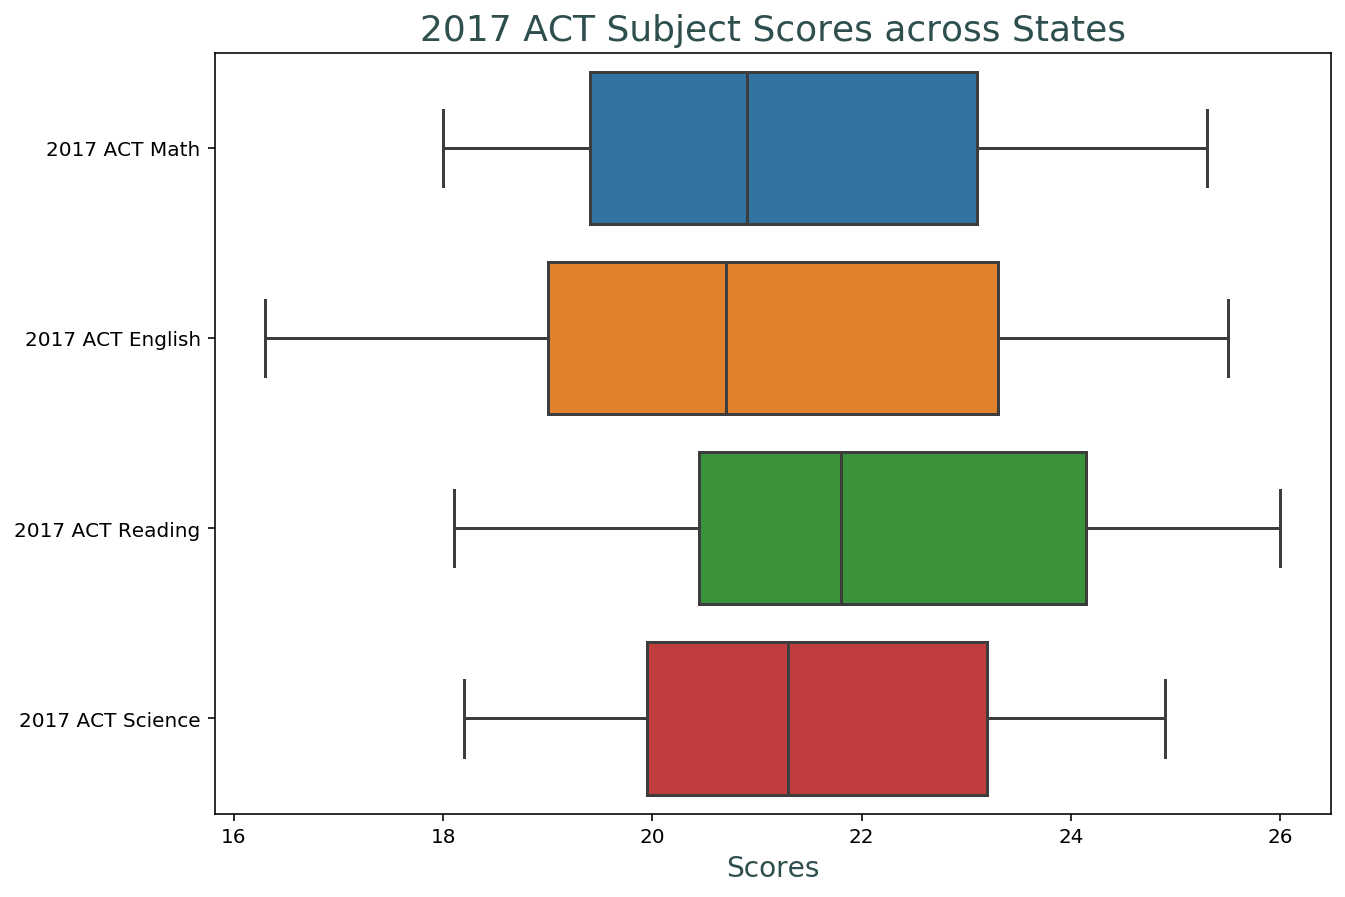

In [213]:
# Using horizontal sns.boxplots by providing dataframe with selected variables to review and their corresponding 
# yticks labels list.
box_data = sat_act_final[['act17_math','act17_english','act17_reading','act17_science']]
ytick_labels = ['2017 ACT Math','2017 ACT English','2017 ACT Reading','2017 ACT Science']
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(data=box_data ,orient='h');
ax.set_title('2017 ACT Subject Scores across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Scores',color=my_label_col, fontsize = my_label_font);
ax.set_yticklabels(ytick_labels);

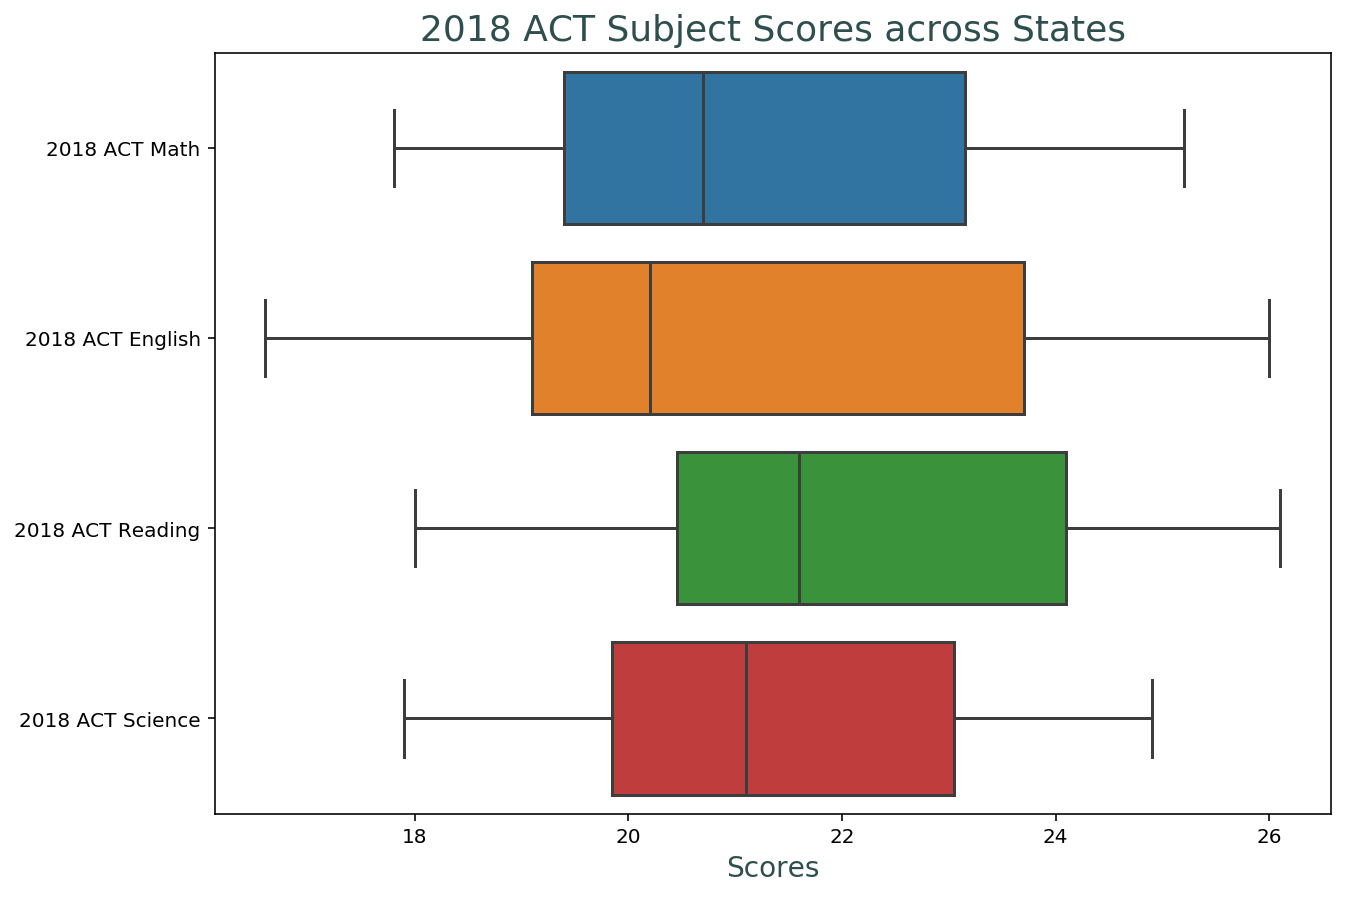

In [215]:
# Using horizontal sns.boxplots by providing dataframe with selected variables to review and their corresponding 
# yticks labels list.
box_data = sat_act_final[['act18_math','act18_english','act18_reading','act18_science']]
ytick_labels = ['2018 ACT Math','2018 ACT English','2018 ACT Reading','2018 ACT Science']
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(data=box_data ,orient='h');
ax.set_title('2018 ACT Subject Scores across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Scores',color=my_label_col, fontsize = my_label_font);
ax.set_yticklabels(ytick_labels);

#### Observation:
- Across both 2017 & 2018, overall range  as well as interquartile range for state level average science score narrower than other subjects, which shows that most states score in a close ballpark from each others. Enlish scores on the other hand can vary widely among states.


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [252]:
# adding skew and kurtosis stats to the data provided by standard describe() funciton.

final_desc['skew'] = sat_act_final.skew()
final_desc['kurtosis'] = sat_act_final.kurtosis()
final_desc.sort_values('kurtosis').sort_values('skew') # sort on skewness and then kurtosis value

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0,-0.197989,-1.631970
act18_participation,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0,-0.021916,-1.738681
sat18_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0,0.136228,-1.569003
act18_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9,0.172383,-1.109301
act18_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1,0.201361,-1.116031
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9,0.218823,-0.956033
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0,0.269366,-0.982094
act18_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2,0.269548,-1.109059
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0,0.272693,-1.220371
act18_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6,0.281962,-1.080666


#### Answers:
Skewness helps us to find distance of mean from the median and given that for a normal distribution median is equal to mean, skew tells us if the ditribution is normal or not. Negative or position value of the skew tells us if the distribution is left skewed or right skewed, or visaully the hump of the curve will be right of the centre or left of the center.

Kurtosis helps us to find on how long the tail of the ditribution is in comparison with the tail of a normal distrution, so its a measure of the outliers present in the data. Lower the value of kurtosis higher the overall higher the hight of the curve in relation to its tail.Kurtosis of a standard normal distribution is 0.

From the skew and kurtosis values provided through final_desc data published above, none of the above variables has a ditribution which is close to a normal distribution. 

Box plots above showed us that mojority of ACT Science and ACT Math scores are placed within narrower ranges and this is reconformed by their standard diviation values (STD for act18_science = 1.87 and act18_math = 2.03) which are the lowest STD values among the ACT 2018 subject scores, explaing narrower spread of these two distributions. 




#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

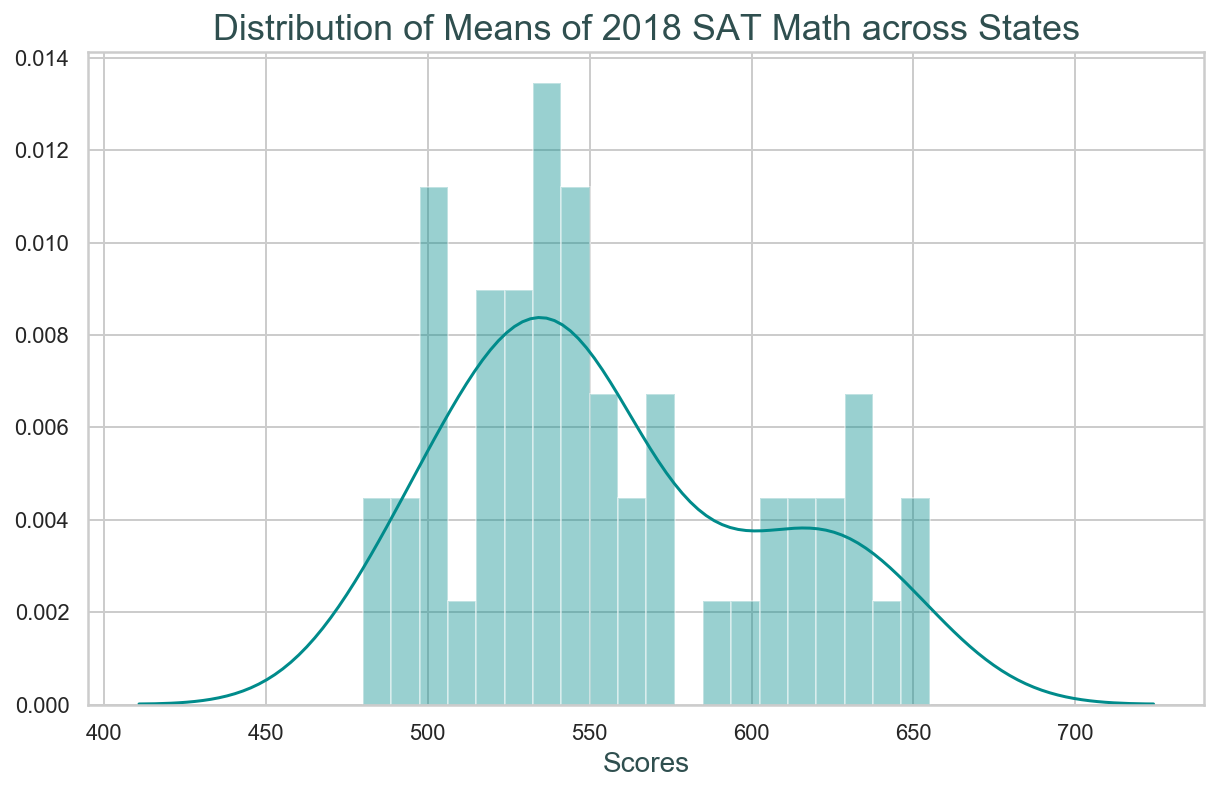

In [407]:
# Draw distribution plot for mean of 2018 SAT Math score  
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(sat_act_final['sat18_math'],bins = 20, color=my_graph_col);
ax.set_title('Distribution of Means of 2018 SAT Math across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Mean Scores',color=my_label_col, fontsize = my_label_font);

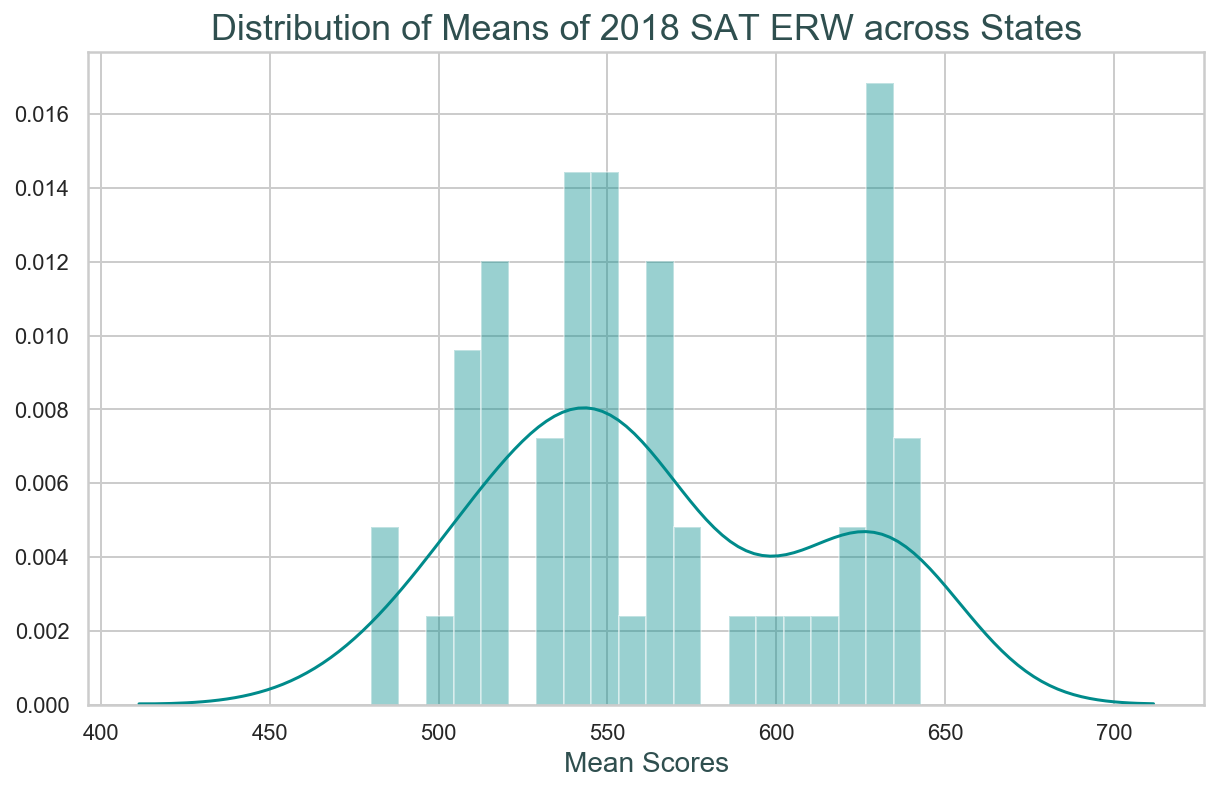

In [409]:
# Draw distribution plot for mean of 2018 SAT ERW score  
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(sat_act_final['sat18_erw'],bins = 20, color=my_graph_col);
ax.set_title('Distribution of Means of 2018 SAT ERW across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Mean Scores',color=my_label_col, fontsize = my_label_font);

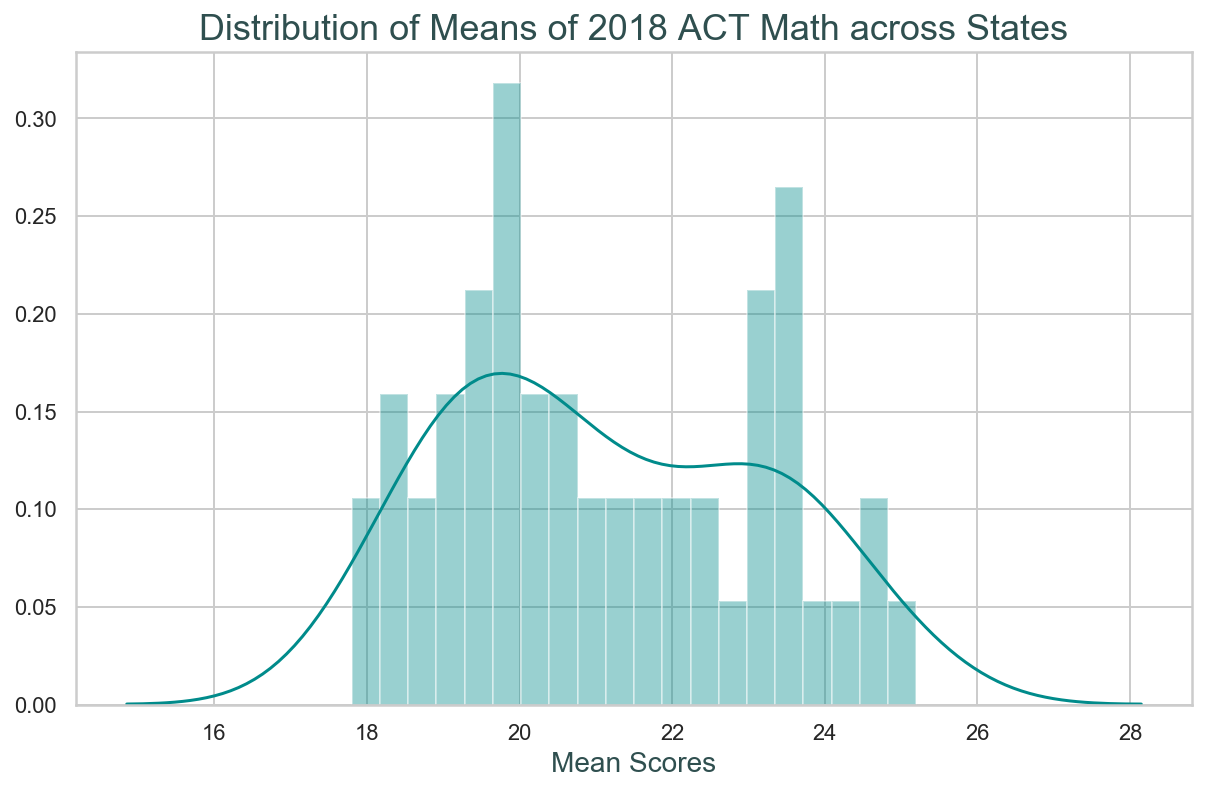

In [408]:
# Draw distribution plot for mean of ACT Math score  
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(sat_act_final['act18_math'],bins = 20, color=my_graph_col);
ax.set_title('Distribution of Means of 2018 ACT Math across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Mean Scores',color=my_label_col, fontsize = my_label_font);

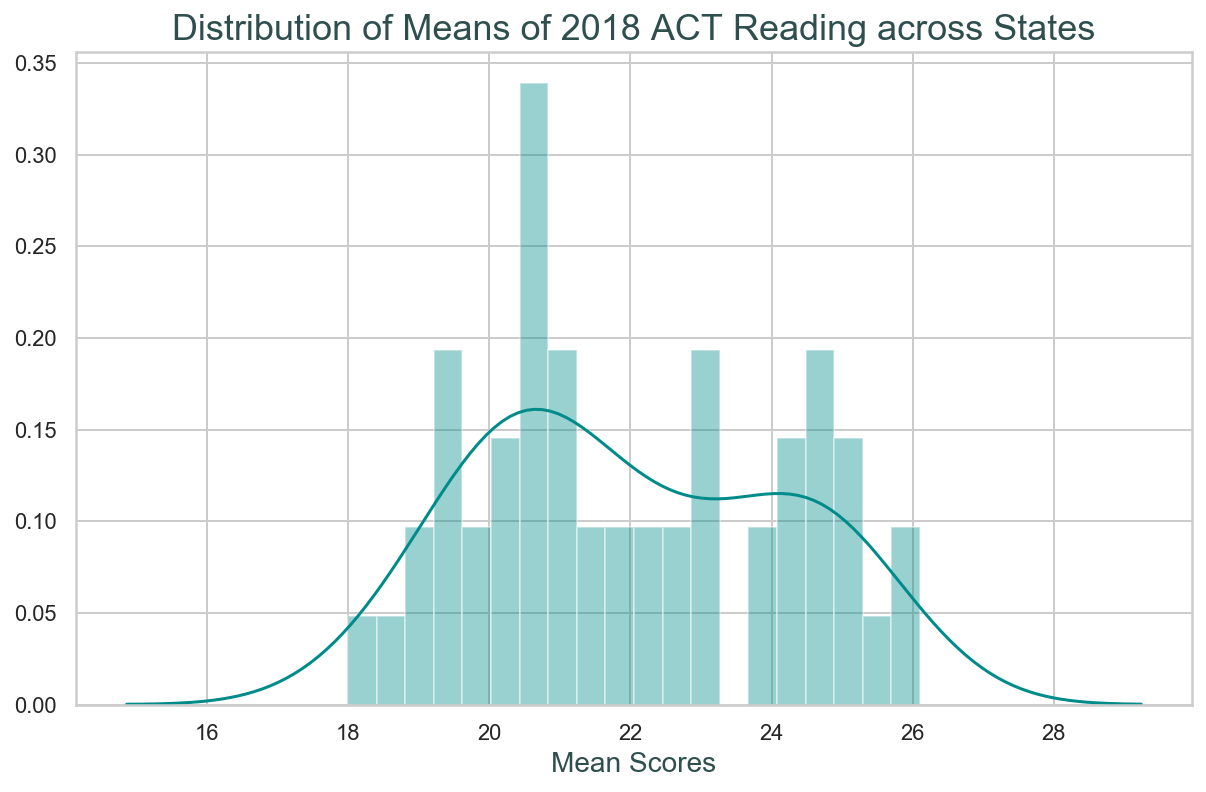

In [528]:
# Draw distribution plot for mean of 2018 ACT Reading score  
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(sat_act_final['act18_reading'],bins = 20, color=my_graph_col);
ax.set_title('Distribution of Means of 2018 ACT Reading across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Mean Scores',color=my_label_col, fontsize = my_label_font);

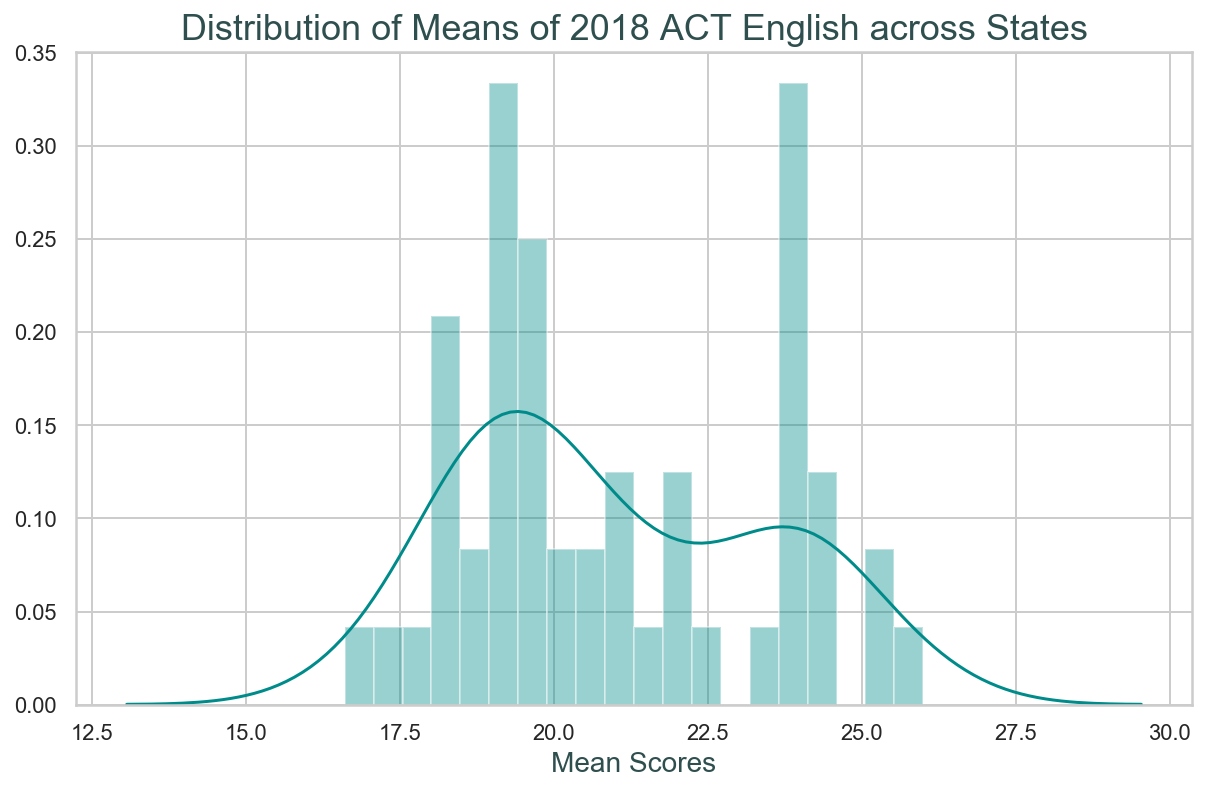

In [529]:
# Draw distribution plot for mean of 2018 ACT English score  
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(sat_act_final['act18_english'],bins = 20, color=my_graph_col);
ax.set_title('Distribution of Means of 2018 ACT English across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Mean Scores',color=my_label_col, fontsize = my_label_font);

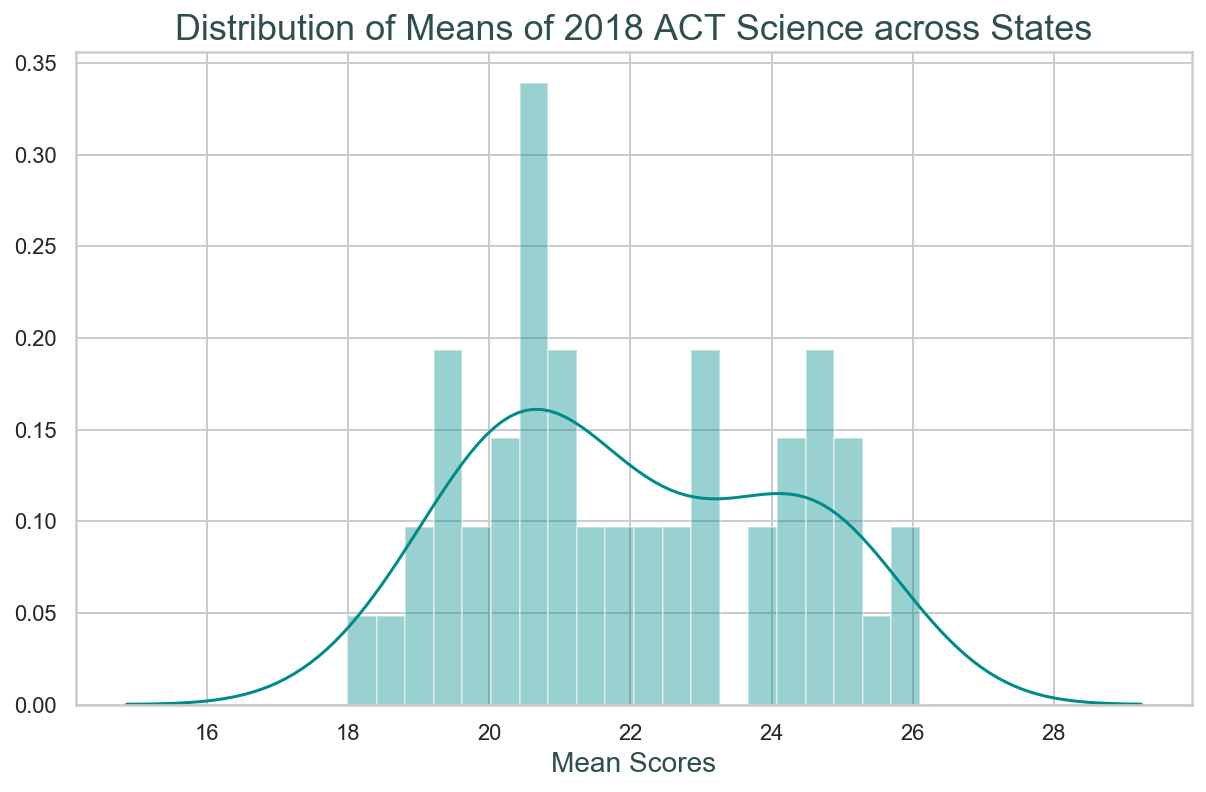

In [411]:
# Draw distribution plot for mean of 2018 ACT Science score  
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(sat_act_final['act18_reading'],bins = 20, color=my_graph_col);
ax.set_title('Distribution of Means of 2018 ACT Science across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Mean Scores',color=my_label_col, fontsize = my_label_font);

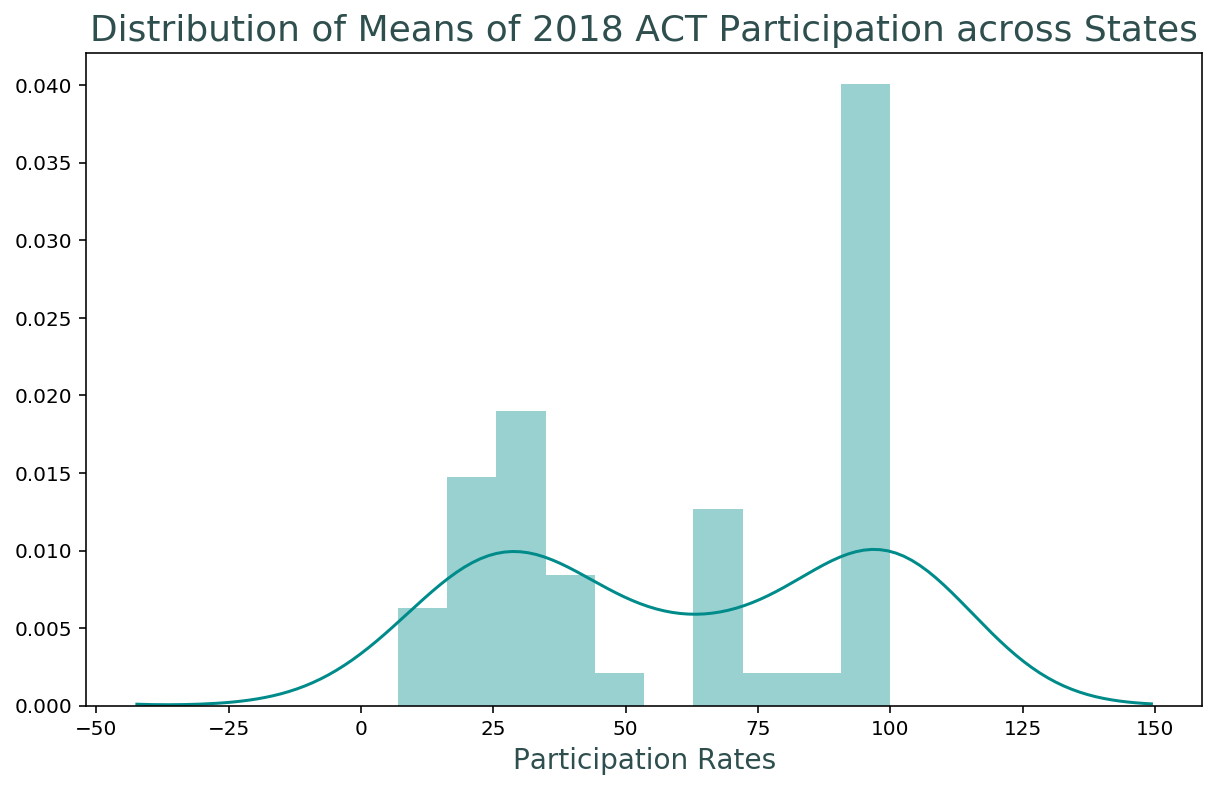

In [250]:
# Draw distribution plot for mean of 2018 ACT Participation rate  
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(sat_act_final['act18_participation'],bins = 10, color=my_graph_col);
ax.set_title('Distribution of Means of 2018 ACT Participation across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Participation Rates',color=my_label_col, fontsize = my_label_font);

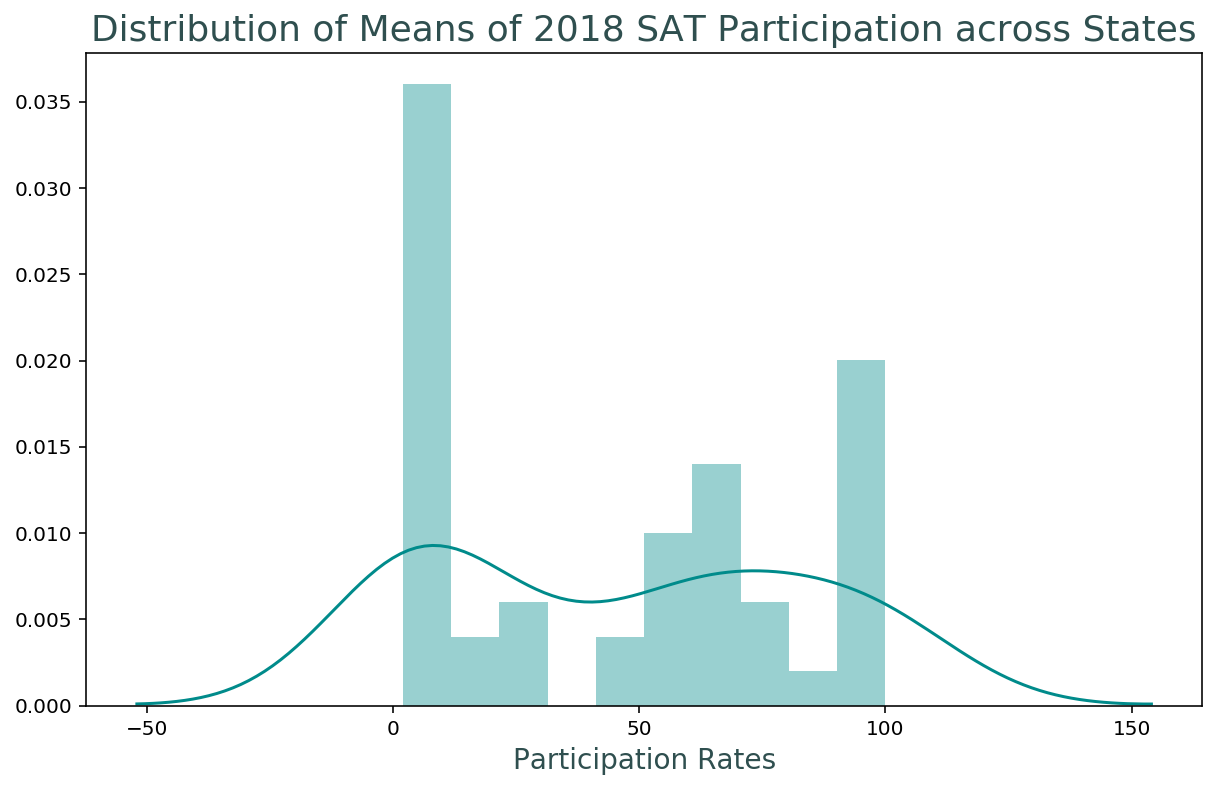

In [251]:
# Draw distribution plot for mean of 2018 SAT Participation rate  
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(sat_act_final['sat18_participation'],bins = 10, color=my_graph_col);
ax.set_title('Distribution of Means of 2018 SAT Participation across States',color = my_title_col,fontsize = my_title_font);
ax.set_xlabel('Participation Rates',color=my_label_col, fontsize = my_label_font);

### Answer: 
No, we do not observe a trend across the sampling means distribution of 51 samples, is a normal distribution. 

### Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

### Answer 
- Math: Even though visually the distribution curves for math are somewhat close to normal curve, however skew & kurtosis values caculated above suggest that none of the sampling means ditribution curve of math tests are 'Normal Distribution'. 

    So this sample mean ditribution can not be used for calculating population 'parameter' since one of the core    requirement of using 'Centeral Limit Theorem' to derive population parameters is that the 'sampling means ditribution is a Normal Distribution'.


- Reading: Both distribution curves for 'Reading' visually as well as skew values caculated above suggest that none of sampling means ditribution curve of 'Reading' tests are a 'Normal Distribution'. 

    So these sample mean ditribution for reading can not be used for calculating population 'parameter', since one of the core requirement of using 'Centeral Limit Theorem' to derive population parameters is that the 'sampling means ditribution is a Normal Distribution'.


- Rate: Just by looking at the distribution curves for 'Participation Rate' visually, and reconfirmed by the skew kurtosis values, it is very clear that none of the sampling means ditribution curves of 'Participation Rates' are 'Normal Distribution'. 

    So these sample mean ditribution for reading can not be used for calculating population 'parameter', since one of the core requirement of using 'Centeral Limit Theorem' to derive population parameters is that the 'sampling means ditribution is a Normal Distribution '.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:Because on the strong nagative correlation (correlation coeffiecient = -.84) between 2017 SAT and ACT, ACT participation rates, yes the relationship between these two variables can be potential used to conduct statistcal inference. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: No, we can not compare the average SAT math scores with average ACT scores becuase the scale of the two tests are different. To really comapre the scores, we will have normalize the datasets to one common scale.    

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

#### Answer
There are three set of states of interest from the exploratory analysis done so far:

1) Colorado & Illinois: both these states had exponential level growth in particiation of SAT from year 2017 to 2018. Colorado moved from 11 percent to 100 percent and Illinois moved from 9 to 99 percent. 

2) Rhode Island: had a good SAT participation rate of 71 percent in 2017, however saw a further big jump to 97 percent in 2018.

3) Florida: is one of the two state which saw a decline in SAT particiaption rate from 2017 to 2018 by a significant rate of 32%. 

External research across news arount and SAT & ACT for states were conducts and listed below are some of the news snippets that provide more insights for the changes that we noticed through exploratory analysis.

##### *"On April 11th, 2017 all Colorado high school juniors will take the SAT. Why does this matter? In 2016, only 5500 Colorado students took the test. Effective this spring, Colorado and the College Board partnered to administer the SAT as the state’s accountability exam and every junior will now take a new four hour exam. The mandated SAT in April also matters for getting into college. Juniors and seniors submit the SAT to colleges as a significant part of the application. That means the SAT in April is worth thinking about. And it’s time to start preparing for the SAT test now. 5500 - the number of students who took the SAT in Colorado in 2016. 56000 - The number of students who will take the SAT in Colorado in 2017." Source - Testive Colorado

##### *"It's official, according to the state: Testing giant ACT is out and the College Board's SAT is in, bringing a new college entrance exam into Illinois public high schools. Source: ChicagoTribune.com-Feb2016 *

##### **"Ninety-five percent of public high school juniors took the SATs this year, 16 percentage points higher than last year, because Rhode Island now requires students to take the college admission test. In 2018, the SATs and PSATs became a graduation requirement, part of the state’s federal education plan." Source - Providence Journal**

##### "About 97 percent of Florida’s class of 2018 took the SAT while in high school, up from 83 percent for the class of 2017. Sixty-six percent of the class took the ACT exam, down from 73 percent for the class of 2017. Officials attributed the increase to many school districts, including those in Central Florida, offering free SAT “school day” events, where teenagers can take the exam during a regular school day with the cost covered by their schools, not their parents. Students have had the chance to take the SAT without any obstacles,” said Jane Dapkus, a vice president at the College Board, during a telephone briefing with reporters.In the past, students had to take the SAT on a Saturday, with their families responsible for getting them there and paying the test fee, now at USD 47.50.The school day program “absolutely has had a big effect” on the number of students taking the SAT, said Mike Gaudreau, executive director of secondary schools for the Seminole County school district." Source- orlandosentinel.com Oct-2018

##### Summary of external research: 
It is quiote clear from the external research that one of the key reasons for SAt participation rate for a state to go up is that state administration beleives that value of SAT for its high schoolers to get admission in good colleges. This belief made them not only fund the SAT tests but also made is mandatory. 

Research on Florida revealed that our particpation data for Florida state may not be correct, however a very important insight was extracted, that many school districts in Florida offered a SAT "school day" which was a weekday instead of Saturday for high schoolers to take this four hours SAT test, and also schools picked up the cost of the test. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

As a College Board person responsible for improving the SAT participation across the nation, and based the past SAT participation rate and external research I would like to make following recommendations:
There are two set of states who are low in their participation rate: i) First are the states with participation rate below 10%, so in those states their is recognition at the value of SAT test for their high schoolers ii)Second are the states whose participation rate ranges between 40 to 60 percent which means that some schools are promoting their students to take test and like Florida, they are probably subsiding them.

I recommend three prong approach and try it on a state like Oregon, where college board should work with state government to help them understand how SAT test will help their high schoolers to get into the better colleges and hence they should support schools to offer SAT for free to their students.

Secondly, work with individual schools encourage them make it easier for their students to take this test like some schools did in Florida i.e. to have the SAT test taken during the weekday rather than Saturday. Also, work with schools to increase the alignment of their curriculum with SAT subject tests to give students better chance to score well.

Third, work with colleges in Oregon state to understand on how SAT improves the college's selection process to bring in students with right aptitude and set them up for success in their college education.
Learnings from working with Oregon state should be recorded to adjust our approach for state where there is very very low participation rate.

                                                    ***
#### Additional Data Request: School District level data on their SAT and ACT participation will further help to not only understand a state's participation better, but also will help to make more customised approach for each school district.                                                     